# **Malaria Detection**

#<b>Problem Definition</b>
**The Context - What are the impacts of Malaria?** <br>
* Malaria is a **highly contagious**, parasitic disease that causes respiratory distress, and even fatality, in the human population by damaging the red blood cells (RBCs) that carry oxygen throughout the body.
* In 2019, there were **> 299 million malaria cases** and **~400,000 malaria related deaths**, with children < 5 yrs old accounting for **67% of all malaria deaths** worldwide.  
* Malaria is transmitted through bites from female Anopheles mosquitoes that have been infected by Plasmodium parasites.  These parasites can remain alive and dormant in a human body for greater than one year, and traditional detection of the disease requires experienced, **trained professionals to study microscopic images of RBCs and discern between healthy and infected cells**.
* Previous evidence has supported the use of ML and AI automated classification techniques to **improve the diagnostic accuracy and rate of detection**, allowing health care professional to diagnose patients earlier and with higher accuracy than traditional methods.

<br>

**The Objective - What is the intended goal?** <br>
* Develop a Deep Learning computer-vision algorithm (CNN) that can **detect malaria by identifying an image of a RBC and determine if the RBC is infected or not**.  Futher classify each image as parasitized for infected RBCs and uninfected for non-infected RBCs.

<br>

**Key Questions:** <br>
* Which computer-vision CNN model is most appropriate for the algorithmic detection of malaria via classification of RBCs?
* What are the real world impacts of various performance metrics (e.g. accuracy, precision, recall, rate of false positives and false negatives, etc) of each model?


# **Solution Summary and Business Impacts**


##**Solution Summary**:
* The proposed solution is a CNN model structure that has been trained on **augmented images** from the labeled training data set.  This solution was chosen based upon the **high overall accuracy of the model (0.98), and high recall for parasitized RBCs (0.99)**.

* When training, the model was observed to have **improved learning capacity** relative to other model variations, indicating a lower tendency to overfit the model and suggests **robust performance when introducing new datasets** during field application.


###**Final Proposed Model Structure Specifications**:
* Augement training and validation image sets via **Image Data Augmentation**.

* At least **3 convolutional layers** with **32 output nodes**, **filter size of 2**, **same padding**, and **ReLU** activation.  First convolutional layer should have an **input shape of (64, 64, 3)**.

* Add MaxPooling and Dropout layers after each convolutional layer with a **pool size of 2** and a **dropout rate of 20%**.

* The addition of Batch Normalization and LeakyReLU activation after each convolutional layer can be **optional**, as no significant improvement to the model structure was observed when tested.

* Add Flatten layer between convolutional and final Dense layers to **convert convolutional outputs to one dimension**.

* Add Dense layer with **512 output nodes** and **ReLU** activation, then add a Dropout layer with a **rate of 40%**.

* Add final Dense layer with **2 cassification output nodes** using **softmax** probability percentages.


##**Business Impacts**:
* The high recall for parasitized RBCs **decreases the rate of false positive occurances**, and **increases the confidence of the model's ability to detect true cases of malaria**.  This performance metric is key in the **allocation of resources in communities** affected by malaria and **tracking the spread** of the disease over time.

* A **small bias may be observed in favor of false negative occurances** over false positive occurances.  This may impact the ability to track disease spread and also impact the timely diagnosis and treatment of malaria in patients (i.e. patients are infected with malaria, but don't know it).  However, it is likely that **patients may show other symptoms of malaria which would generate a second analysis** (e.g. visual confirmation of RBCs via healthcare professional).

#**Overall Key Findings**:

1.   Quick and accurate malaria detection in red blood cells (RBCs) was acheived using computer-vision Convolution Neural Network modeling, with an **overall accuracy of 98%**, and **recall of 99% for parasitized RBCs**.

2.   Several variations of CNNs were trained and tested on a large set of RBC images.  Each variation tested the capacity and performance of the CNN model and a **final model was proposed based upon the best combination of performance metrics (e.g. accuracy, precision) and learning capacity**.


#**Recommendations for Implementation**

##**Key Recommendations**:

* Evaluate proposed model performance on **new, randomly selected, test data** sets (e.g. RBC images collected in different locations/populations).

* Determine **where** model will be implemented and dedicate team to **monitor model performance** and perform **tuning as necessary**.

##**Key Actionables for Stakeholders**:

* **Engage medical community** to provide contextual insight on impacts of model performance.

* Understand current malaria data (e.g. number of infections/fatalities per area, rate of disease spread, etc) to **establish baseline** community impact of the disease.

* Identify **key performance indicators** (KPIs) to monitor success of implemented model.

##**Expected Benefits and/or Costs**:

**Benefits**:

* **Reduced rate of fatality** in both children and adults due to **earlier and more accurate detection** of malaria in patitents.

* **Stronger sensitivity** to true positive cases of malaria, facilitating more **effective allocation of medical resources** in communities that need treatment.  Also allows for **more accurate tracking of disease** spread.

* **Reduced overhead costs** on facilities in underserved communities (e.g. less need for laboratories and specialty equipment in the field).

**Costs**:

* **Small rate of false negatives may occur**, requiring second analysis of RBCs by trained professionals (may be reduced by tuning model hyperparameters).

* Financial costs required to **ensure computational resourcing is available** to run proposed model.

##**Risks and Challenges**:

* Small **risk for false negative identifications** and even smaller **risk of false positive** identifications.

* Model may **require multiple revisions** after field-implementation.

* Implementation of model will **require knowledgeable data engineer/scientist** to update and monitor performance over time.

# <b>Data Set Description </b>

There are a total of 24,958 train and 2,600 test images (RBG colored) that have been acquired from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized, or "infected", cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected, "healthy", cells are free of the Plasmodium parasites<br>


###<b> Mount the Drive

In [ ]:
# mount google drive to access raw data file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Import Libraries</b>

In [ ]:
# import initial relevant libraries

# import libraries and modules to open and manipulate data file
import zipfile  # required to open .zip data file
import os       # required to allow Python to access file directory - needed to find .zip file in OS directory
from PIL import Image     # import Image module from Python Image Library, allows Py to open and manipluate images

# import libraries for data manipluation and preprocessing
import numpy as np    # used in data preprocessing and formatting (e.g. creating arrays for CNN input data)
import pandas as pd   # used in data preprocessing and formatting

# import libraries for basic data visualization
import matplotlib.pyplot as plt   # used to create plots within notebook
import seaborn as sns             # used to create advanced plots within notebooks (e.g. heatmaps)

# import libraries for basic model development
from sklearn.model_selection import train_test_split    # import data split module to create training and testing data sets
from sklearn.preprocessing import MinMaxScaler          # import MinMaxScalar module for data preprocessing such as value normalization

# import notebook formatting for better human readability
import warnings                    # ignore warnings to format notebook for human readability
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)    # remove limit of columns displayed in data frames
pd.set_option('display.max_rows', 200)        # set limit of rows displayed in data frames

### <b>Load the Raw Data and Reformat Data Sets</b>

In [ ]:
# import .zip file and extract contents

zip_path = '/content/drive/MyDrive/ADSP_Week10_CapstoneProject/cell_images.zip'   # create variable with .zip file path
extract_path = '/content/drive/MyDrive/ADSP_Week10_CapstoneProject'               # create variable for extracted .zip file destination path

with zipfile.ZipFile(zip_path, 'r') as zip_ref:       # open .zip file as read only and store as 'zip_ref' temporarily
    zip_ref.extractall(extract_path)                  # extract .zip file contents to destination path

In [ ]:
# write code to resize training images and format to 4D array for CNN input data

# set up initial variables
train_dir = '/content/drive/MyDrive/ADSP_Week10_CapstoneProject/cell_images/train'    # create directory for extracted training data
SIZE = 64     # define image size variable for future code

In [ ]:
# create empty lists for training data images and binary label arrays
train_images = []   # results will be 64 x 64 image arrays
train_labels = []   # results will be binary for uninfected (0) or parasitized (1)

In [ ]:
# create for loop to open each image, resize it, convert it to an array, and create label:

for folder_name in ['/parasitized/', '/uninfected/']:     # create for loop to access data in both file locations
    images_path = os.listdir(train_dir + folder_name)     # define folder path using os.listdir() module

    for i, image_name in enumerate(images_path):          # begin for loop to pull each (i, image_name) tuple enumerated in 'images_path'

        try:    # create try statement to open and format images, useful when handling unknown data that may cause errors in the programming

            image = Image.open(train_dir + folder_name + image_name)    # open each image in the file path directory
            image = image.resize((SIZE, SIZE))                          # resize each image to 64 x 64
            train_images.append(np.array(image))        # convert 'image' variable to np.array and append to empty list

            if folder_name == '/parasitized/':    # create if statement to assign 1 and 0 labels to training images
                train_labels.append(1)            # if image came from 'parasitized' folder then append '1' to the empty list
            else:
                train_labels.append(0)            # if image did NOT come from 'parasitized' folder then append '0' to the empty list

        except Exception:         # blanket Exception catch phrase (e.g. ValueError, TypeError, etc)
            pass      # instructs code to ignore Exceptions caught in previous line of code

In [ ]:
# convert lists into arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
# repeat previous lines of code for test images and labels data set

test_dir = '/content/drive/MyDrive/ADSP_Week10_CapstoneProject/cell_images/test'    # create directory for extracted test data

In [ ]:
# create empty lists for test data images and binary label arrays
test_images = []
test_labels = []

In [ ]:
# repurpose previous for loop to open test dataset and reformat it
for folder_name in ['/parasitized/', '/uninfected/']:
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            image = Image.open(test_dir + folder_name + image_name)
            image = image.resize((SIZE, SIZE))
            test_images.append(np.array(image))

            if folder_name == '/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass

In [ ]:
# convert lists into arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

###<b> Check Shape of Train and Test Images

In [ ]:
# confirm 4D shape of reformatted arrays
print('The shape of the training data set images array is:', train_images.shape)
print('The shape of the test data set images array is:', test_images.shape)


The shape of the training data set images array is: (24958, 64, 64, 3)
The shape of the test data set images array is: (2600, 64, 64, 3)


###<b> Check Shape of Train and Test Labels

In [ ]:
# confirm 1D shape of binary image labels
print('The shape of the training data set labels array is:', train_labels.shape)
print('The shape of the test data set labels array is:', test_labels.shape)

The shape of the training data set labels array is: (24958,)
The shape of the test data set labels array is: (2600,)


## **Observations and insights**:
* The **training data set has 24,958 images**, each image is a **64 x 64 grid** of pixels and has **3 channels** for each image (indicating red, blue, green colorscale).

* The **test data set has 2600 images** with the same dimensions as the training data set.  The test data set comprises of only ~9% of the total set of images.

* Both data sets now have corresponding binary labels for each image, **uninfected RBC images are labeled as '0'** and **parasitized RBC images are labeled as '1'**.  The image-label pair will be used to train the CNN model and calculate performance metrics.


### <b>Check Minimum and Maximum Range of Pixel Values for Train and Test Images

In [ ]:
# confirm minimum and maximum pixel values for training data set
print('The minimum pixel value in the training images data set is:', np.min(train_images))
print('The maximum pixel value in the training images data set is:', np.max(train_images))

The minimum pixel value in the training images data set is: 0
The maximum pixel value in the training images data set is: 255


In [ ]:
# confirm minimum and maximum pixel values for test data set
print('The minimum pixel value in the test images data set is:', np.min(test_images))
print('The maximum pixel value in the test images data set is:', np.max(test_images))

The minimum pixel value in the test images data set is: 0
The maximum pixel value in the test images data set is: 255


##**Observations and insights**:

* The range of pixel values in both train and test data sets is **0-255**.
* Each image is an array of **64 x 64 pixels with 3 channels** (red, blue, green)

###<b> Count Total Number of Values in Uninfected and Parasitized Image Sets

In [ ]:
# count number of uninfected and parasitized images in training data set
uninfected = 0
parasitized = 1

uninfected_count = np.sum(train_labels == uninfected)
print('The total number of uninfected RBC images in the training data set is:', uninfected_count)

parasitized_count = np.sum(train_labels == parasitized)
print('The total number of parasitized RBC images in the training data set is:', parasitized_count)

The total number of uninfected RBC images in the training data set is: 12376
The total number of parasitized RBC images in the training data set is: 12582


In [ ]:
# count number of uninfected and parasitized images in the test data set
uninfected_count_2 = np.sum(test_labels == uninfected)
print('The total number of uninfected RBC images in the test data set is:', uninfected_count_2)

parasitized_count_2 = np.sum(test_labels == parasitized)
print('The total number of parasitized RBC images in the test data set is:', parasitized_count_2)

The total number of uninfected RBC images in the test data set is: 1300
The total number of parasitized RBC images in the test data set is: 1300


###<b>Normalize the Images

In [ ]:
# divide training and test data sets by maximum pixel value (255) to normalize the images and then convert to float32 data type
train_images = (train_images / 255).astype('float32')
test_images = (test_images / 255).astype('float32')

##**Observations and insights**:

* Initial observation of the data suggests that the data is balanced:
> * The 24,958 total images in the training data are split into two categories: **'uninfected' (49% of images)** and **'parasitized' (51% of images)**, therefore the training data set contains a good representation of images to develop and train the CNN model.
> * The test data set has an **even split**of uninfected and parasitized RBC images, 1300 images each.

###<b> Plot to Confirm that Data is Balanced

In [ ]:
# create df variable for training data set and test data set
train_labels_df = pd.DataFrame(train_labels)
train_labels_df.columns = ['Infection_Status']

In [ ]:
test_labels_df = pd.DataFrame(test_labels)
test_labels_df.columns = ['Infection_Status']

In [ ]:
# create df with frequency counts for uninfected and parasitized images
train_infection_status_counts = train_labels_df['Infection_Status'].value_counts()
test_infection_status_counts = test_labels_df['Infection_Status'].value_counts()

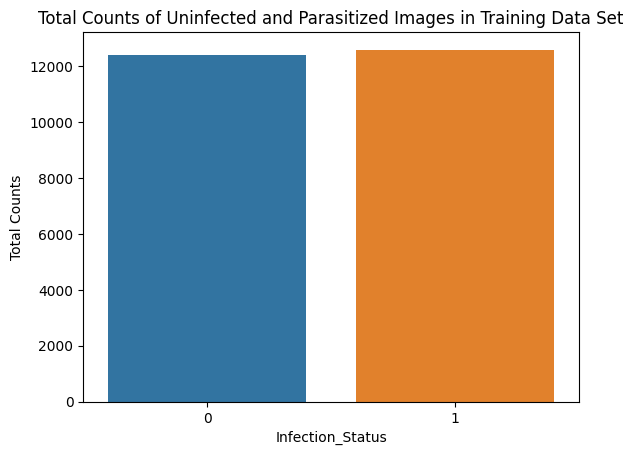

In [ ]:
# create bar plot of data set labels to confirm initial observation of unbalanced data
sns.barplot(x = train_infection_status_counts.index,
            y = train_infection_status_counts.values)

plt.xlabel('Infection_Status')
plt.ylabel('Total Counts')
plt.title('Total Counts of Uninfected and Parasitized Images in Training Data Set');

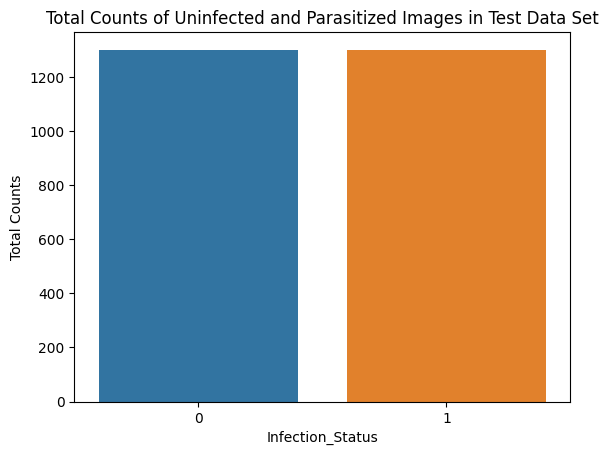

In [ ]:
sns.barplot(x = test_infection_status_counts.index,
            y = test_infection_status_counts.values)

plt.xlabel('Infection_Status')
plt.ylabel('Total Counts')
plt.title('Total Counts of Uninfected and Parasitized Images in Test Data Set');

##**Observations and Insights**:
* Bar plots confirm that the distribution of data in the training/test split is **balanced**, this means that the model will be trained on a representative data set.

## <b>Data Exploration</b>

###**Visualize Images in Data Set**

In [ ]:
# set seed number for random number generation in Numpy
np.random.seed(12)

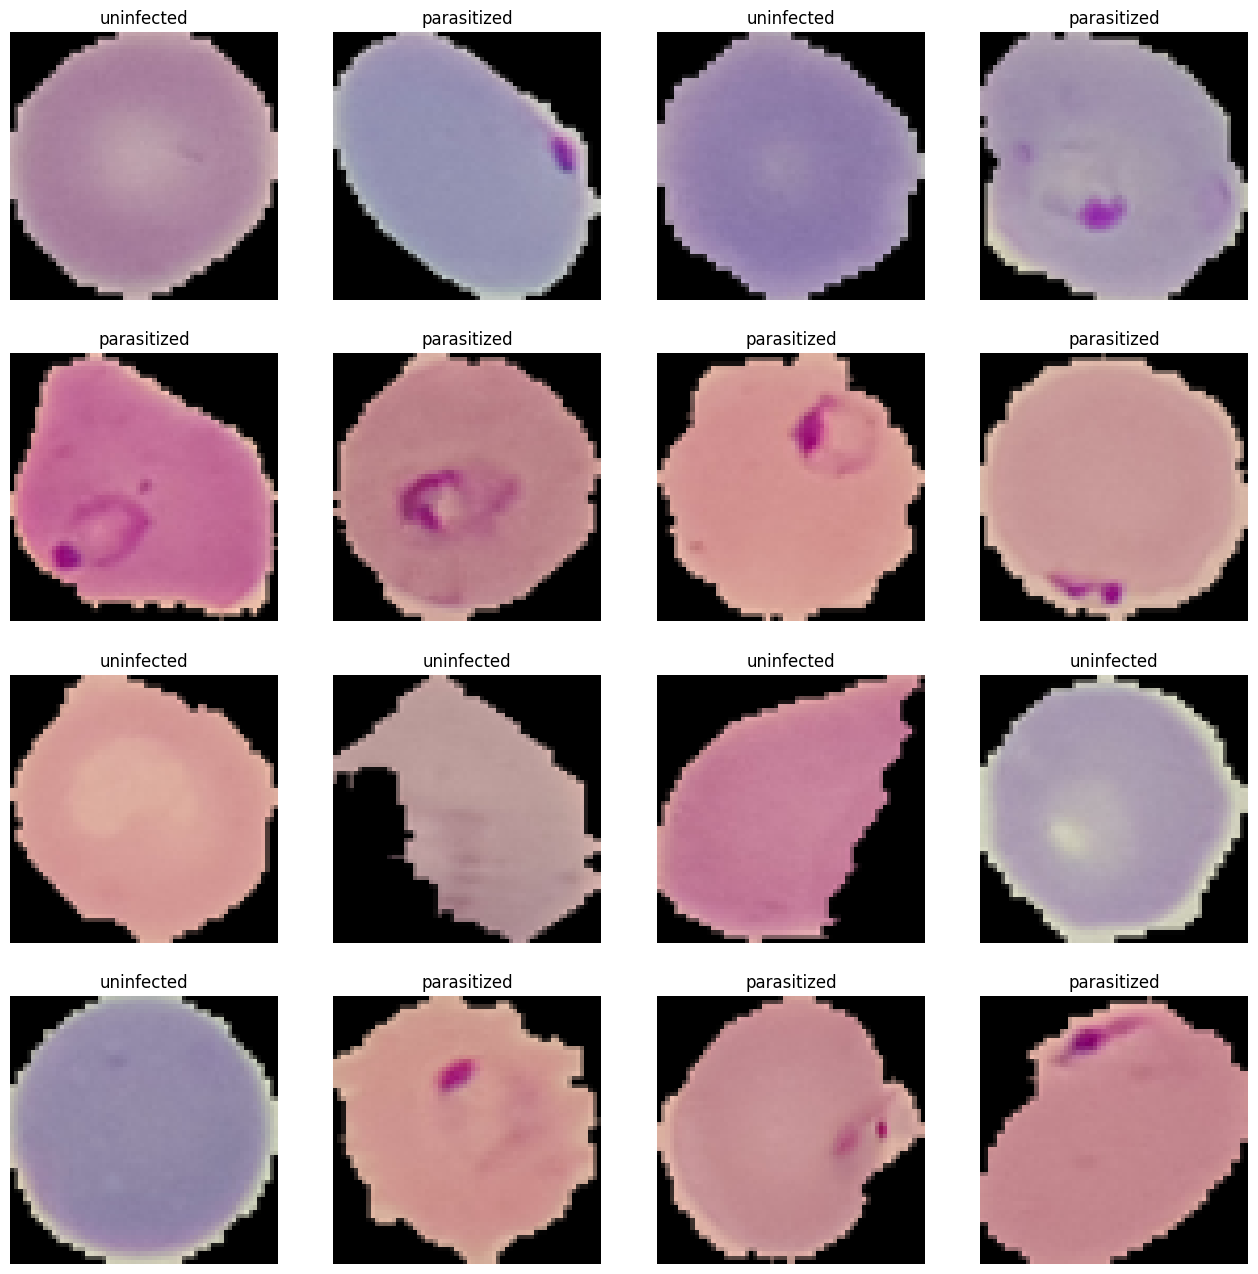

In [ ]:
# create parent figure structure
plt.figure(1,                       # '1' is the figure identification number, can be used to refer to this specific figure in late code
            figsize = (16, 16))     # set figure dimensions (in inches)

# create for loop to fill out parent figure
for n in range(1, 17):        # start for loop for 16 iterations

    plt.subplot(4,      # create subplot within parent figure, rows = 4
                4,      # set columns = 4
                n)      # define where the 4 x 4 subplot will exist within parent plot, at location 'n'

    # define index variable that is converted to standard int type (instead of np int type)
    index = int(np.random.randint(0,                      # set lower bound to '0'
                                  train_images.shape[0],  # set upper bound to 24,958 (total number of training images)
                                  1))                     # instructs to only return one integer

    # create if statement to label subplots with corresponding infection status labels
    if train_labels[index] == 1:      # if index slice result = 1, then label as 'parasitized'
        plt.title('parasitized')
    else:
        plt.title('uninfected')       # if index slice result =/= 1, then label as 'uninfected'

    plt.imshow(train_images[index])   # display the training image corresponding the index slice
    plt.axis('off')     # remove plot axis from plot

##**Observations and Insights**:
> Viewing the images above, some observations about RBC characteristics can be concluded:
* There is **inconsistent background lighting across the RBC images** (some brightly lit, some darker).  This inconsistency may affect the model's ability to distinguish region boundaries.
* **Each image is represented by a range of colors** (pink, purple, red, blue, etc), irrespective of infection status.  This variation in image color may affect the model's robustness in distinguishing between th two classes of cells.
* The RBC images** lack a common defined shape** (smooth round, oblong, jagged edge, etc).  This may affect the model's ability to detect common larger features in RBC shape.
* Uninfected RBCs appear to exhibit a **homogenous color profile** within the cell.
* Parasitized RBCs appear to exhibit a **heterogenous color profile** with the cell, indicating the the malaria virus is present in the RBC.

###<b> Visualize Images with subplot(6, 6) and figsize = (12, 12)

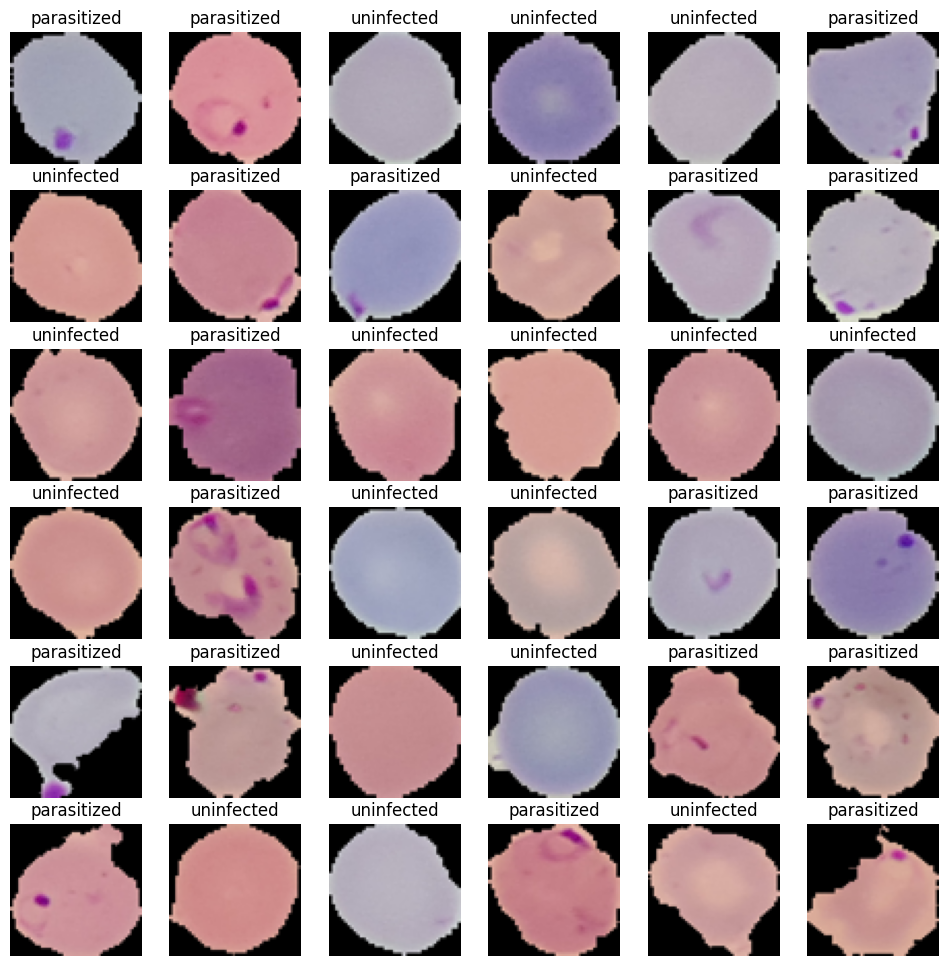

In [ ]:
# create parent figure structure
plt.figure(2,                       # '2' is the figure identification number, can be used to refer to this specific figure in late code
            figsize = (12, 12))     # set figure dimensions (in inches)

# create for loop to fill out parent figure
for n in range(1, 37):        # start for loop for 36 iterations

    plt.subplot(6,      # create subplot within parent figure, rows = 6
                6,      # set columns = 6
                n)      # define where the 6 x 6 subplot will exist within parent plot, at location 'n'

    # define index variable that is converted to standard int type (instead of np int type)
    index = int(np.random.randint(0,                      # set lower bound to '0'
                                  train_images.shape[0],  # set upper bound to 24,958 (total number of training images)
                                  1))                     # instructs to only return one integer

    # repeat if statement from previous plot to label subplot images
    if train_labels[index] == 1:
        plt.title('parasitized')
    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])   # show training image corresponding to index slice
    plt.axis('off')   # remove parent figure axis from plot

##**Observations and Insights**:
Observation of the larger 6 x 6 population of RBCs confirms initial observations concluded in the 4 x 4 plot:
* Cell shape (round or oblong) is not defined by infection status
* Cell color (red, blue, or purple) is not defined by infection status
* Cell homogeneity (homogeneous or heterogeneous) is a defining characteristic of parasitized vs uninfected cells.

Both uninfected and parasitized cells can be round or oblong, or any shade between red and blue.  **Only parasitized cells have a defined hetergeneous color profile within the cell**, specifically that the cell image will have a darker color region that contrasts with the surrounding cell area, indicating the presence of the malaria virus.  **The model with the most success will benefit from learning how to detect these changes in color**.

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# create function to find the average image for parasitized and uninfected RBCs
# will be used to create new images that represent the mean pixel value within the entire image matrix

def find_mean_img(full_mat,     # 'full_mat' is placeholder variable for user-defined array
                  title):       # 'title' is placeholder variable for user-defined label that corresponds to chosen array

    # define function to calculate mean
    mean_img = np.mean(full_mat, axis = 0)[0]   # use np.mean() to find average of chosen array
                                                # define 'axis = 0' to average across all images at the corresponding position
                                                #(i.e. the mean value for position 'A' in the image will be calculated from all position "A"s in the image set)
                                                # [0] will slice only the first element of the returned np.mean array

    # reshape returned mean values into a matrix
    plt.imshow(mean_img)    # 'plt.imshow()' will plot pixel values as a heatmap, allows visualization of 2D data
    plt.title(f'Average {title}')   # format title of averaged image
    plt.axis('off')     # remove axis from plot
    plt.show()          # show image in notebook

    return mean_img     # returns function result

<b> Mean image for parasitized

In [ ]:
# add in user-defined parameters to previously defined function

# first create empty list to store parasitized data array generated from function
parasitized_data = []

In [ ]:
# create for loop to comb image and label data sets, then add parasitized images to the empty list
for img, label in zip(train_images, train_labels):    # code scans each (img, label) pair from the corresponding data sets
    if label == 1:      # parasitized images previous defined as '1'
        parasitized_data.append([img])
        # add image to parasitized_data list, formatted as sublist '[]' to keep image arrays separated as list grows longer

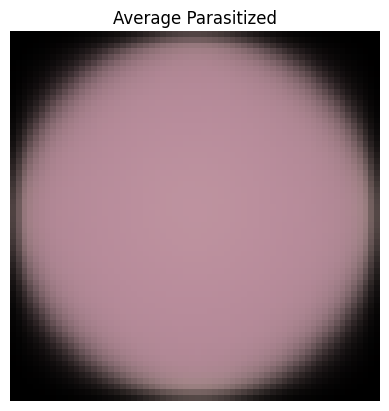

In [ ]:
# calculate the mean using defined function
parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # define 'full_mat' and 'title' parameters

<b> Mean image for uninfected

In [ ]:
# repeat previous code steps for uninfected images

 # create empty list to store isolated image arrays from for loop below
uninfected_data = []

for img, label in zip(train_images, train_labels):    # scan (img, label) pair in training data sets
    if label == 0:         # identify uninfected images by labels == 0
        uninfected_data.append([img])     # add image to empty list, using [] to keep image arrays separate as list grows


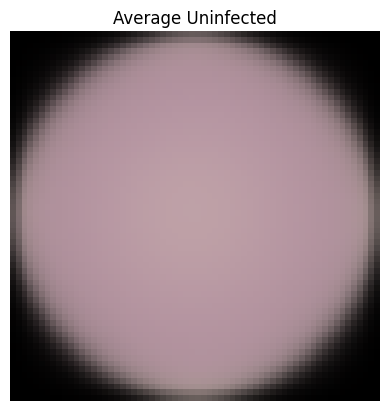

In [ ]:
# calculate mean image of uninfected cells
uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')

##**Observations and Insights**:
* To the human eye, the **averaged images of parasitized and uninfected RBCs
 both have the same cell shape and color homogeneity** (no defined secondary color regions within the cell).

* The **main contrast between parasitized and uninfected cells is the overall color hue of the average cell image**.  The averaged parasitized cell image appears to be darker, or stronger, in color than the averaged uninfected cell image.  This is most likely due to the **contribution of darker color regions by the malaria virus**, observed in the previous sets of images.  Since the malaria virus is not consistently detected within the same section of the RBC, the darker color is averaged across of sections of the cell images.

* A threshold classifer of average pixel value could possibly be used to identify uninfected vs parasitized cells in the model, but the **RBG format of the training data can be affected by the brightness of cell image**.  Inconsistent background lighting within the training data set may bias the results of a model that is relying on averaged results to make a prediction.

### <b>Converting RGB to HSV of Images using OpenCV

####<b> Converting the train data

In [ ]:
# import OpenCV into notebook
import cv2

In [ ]:
# create empty list to hold new HSV image array
gfx = []

# create for loop to open first 100 RGB images and convert them to HSV
for i in np.arange(0, 100, 1):   # define range 0-99 with step size = 1

    # define intermediate parameter 'a' for HSV-converted image
    a = cv2.cvtColor(train_images[i],       # convert the RGB image at slice 'i' from the training data set
                     cv2.COLOR_BGR2HSV)     # specify 'cv2.COLOR_BGR2HSV' conversion code; BGR is default channel order in OpenCV

    # add new HSV image to empty list
    gfx.append(a)

# convert gfx list into an array
gfx = np.array(gfx)

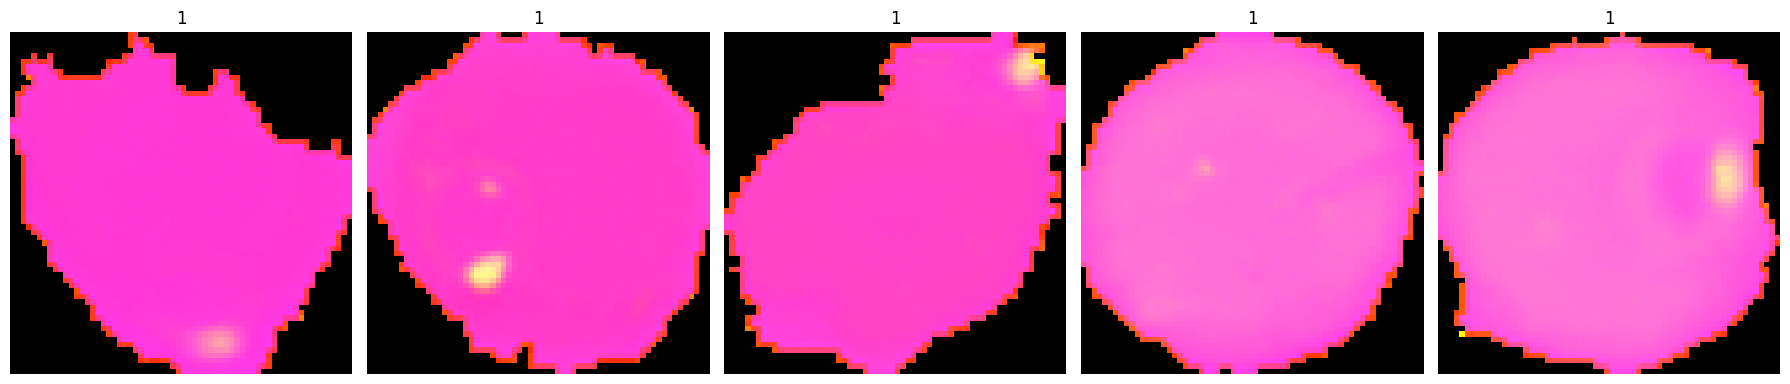

In [ ]:
# create code to view HSV image
viewimage = np.random.randint(1, 100, 5)
# generates list of 5 random integers between 0-99, which will be used to slice images from the gfx array

# create plot structure for viewing HSV images
fig, ax = plt.subplots(1, 5, figsize = (18, 18))    # creates a figure with 5 subplots (ax), arranged as 1 row with 5 columns
                                                    # each subplot figure is 18 x 18

# create for loop to populate plot(s)
for t, i in zip(range(5), viewimage):     # scans (t, i) pairing over the 5 randomly selected integers in 'viewimage' list
    Title = train_labels[i]       # define 'Title' parameter as the corresponding label to the selected index 'i'
    ax[t].set_title(Title)        # define subplot titles as 'Title' variable defined above
    ax[t].imshow(gfx[i])          # shows HSV image corresponding to index 'i' in 'gfx' array
    ax[t].set_axis_off()          # turn off axis formatting for subplots
    fig.tight_layout()            # formats subplots spacing

####<b> Converting the test data

In [ ]:
# create empty list
gfx_2 = []

# create for loop to open first 100 RGB images and convert them to HSV
for i in np.arange(0, 100, 1):   # define range 0-99 with step size = 1

    # define intermediate parameter 'a' for HSV-converted image
    a = cv2.cvtColor(test_images[i],       # define which RGB image to convert
                     cv2.COLOR_BGR2HSV)     # specify 'cv2.COLOR_BGR2HSV' conversion code; BGR is default channel order in OpenCV

    # add new HSV image to empty list
    gfx_2.append(a)

# convert gfx list into an array
gfx_2 = np.array(gfx_2)

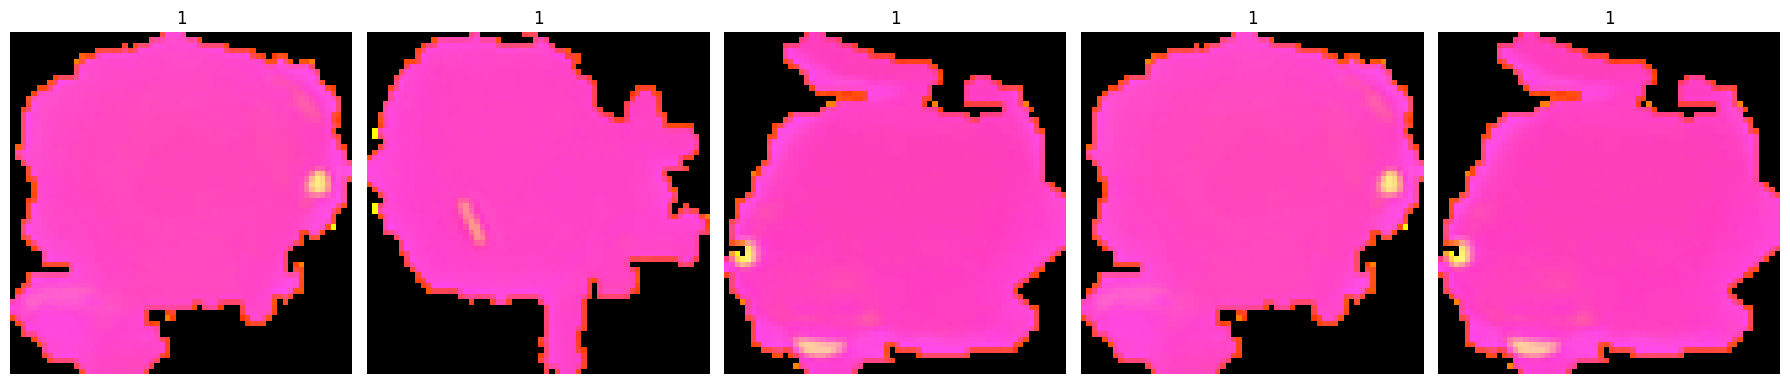

In [ ]:
# create code to view HSV image
viewimage = np.random.randint(1, 100, 5)    # generates 5 random integers between 0-99, which will be used to slice images from the gfx_2 array

# create plot structure for viewing
fig, ax = plt.subplots(1, 5, figsize = (18, 18))    # creates a figure with 5 subplots (ax), arranged as 1 row with 5 columns
                                                    # each subplot figure is 18 x 18

# create for loop to populate plot(s)
for t, i in zip(range(5), viewimage):     # scans (t, i) pairing over the 5 randomly selected integers in 'viewimage'
    Title = test_labels[i]       # define 'Title' parameter as the corresponding label to the selected index 'i'
    ax[t].set_title(Title)        # define subplot titles as 'Title' variable defined above
    ax[t].imshow(gfx_2[i])        # shows HSV image corresponding to index 'i' in 'gfx_2' array
    ax[t].set_axis_off()          # turn off axis formatting for subplots
    fig.tight_layout()            # formats subplots spacing

##**Observations and insights**:
* Converting the training and test images to Hue, Saturation, Value (HSV) images provides a **better segmentation of different color regions within the cells**.  This will allow the model to better define boundaries between cell regions (e.g. malaria virus region vs normal cell background region).

* **HSV images contain one less dimension than RBG images**, which reduces the amount of computational power required for the model.

* By design, **HSV images separate color (hue) from brightness (value)**, whereas RBG images combine color and brightness.  Different lighting conditions in each RBG image can interfere with the models ability to distinguish boundaries within the cell.  **HSV images allow the model to become more robust against changing lighting conditions of the original data set**.

###<b> Processing Images using Gaussian Blurring

####<b> Gaussian Blurring on train data

In [ ]:
# create empty list to hold blurred images
gbx = []

# define for loop to blur frist 100 RBG images using Gaussian Blur method
for i in np.arange(0, 100, 1):      # define range 0-99 with step size 1
    b = cv2.GaussianBlur(train_images[i],(5, 5), 0) # define intermediate variable 'b' to that returns a pixel value calculated from a 5 x 5 size Gaussian filter
    gbx.append(b)   # add value to 'gbx' list

# convert gbx list to array
gbx = np.array(gbx)

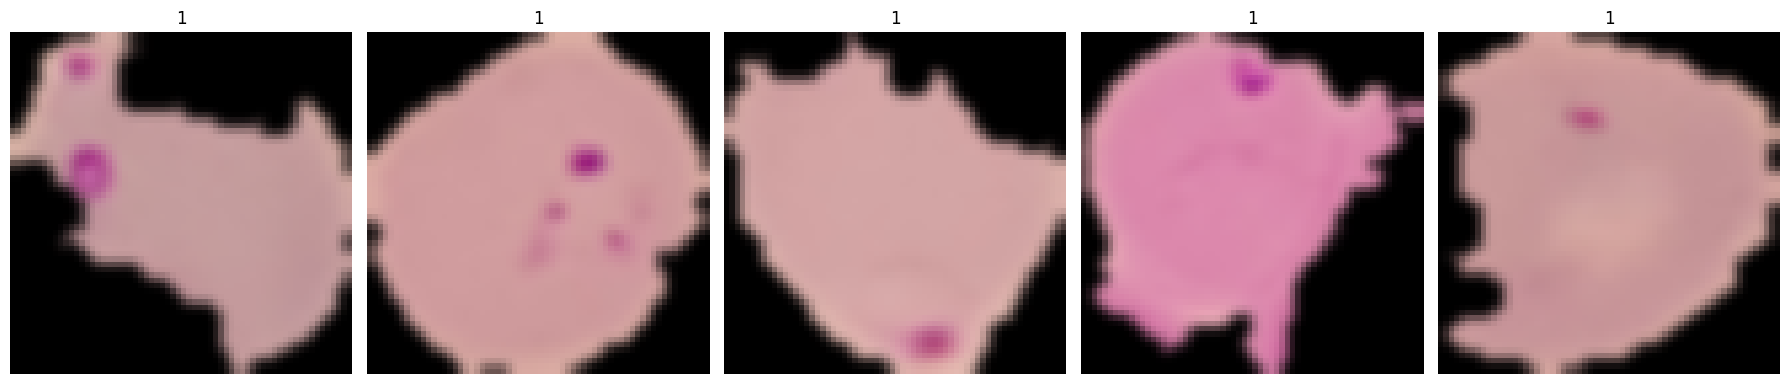

In [ ]:
# view randomly selected blurred images
viewimage = np.random.randint(1, 100, 5)    # randomly generate 5 integers that will be used to slice images from 'gbx' for display

# create figure with subplots for visualization reusing previous code from HSV image visualization
fig, ax = plt.subplots(1, 5, figsize = (18, 18))
for t, i in zip(range(5), viewimage):
    Title = train_labels[i]
    ax[t].set_title(Title)
    ax[t].imshow(gbx[i])    # specify 'gbx' array
    ax[t].set_axis_off()
    fig.tight_layout()

####<b> Gaussian Blurring on test data

In [ ]:
# creat empty list to hold blurred images
gbx_2 = []

# define for loop to blur first 100 RBG images using Gaussian Blur method
for i in np.arange(0, 100, 1):
    b = cv2.GaussianBlur(test_images[i], (5, 5), 0)   # repeat code from previous blurring step, specify 'test_image[i]' for test data set
    gbx_2.append(b)   # add to 'gbx_2' list

# convert gbx_2 list to array
gbx_2 = np.array(gbx_2)

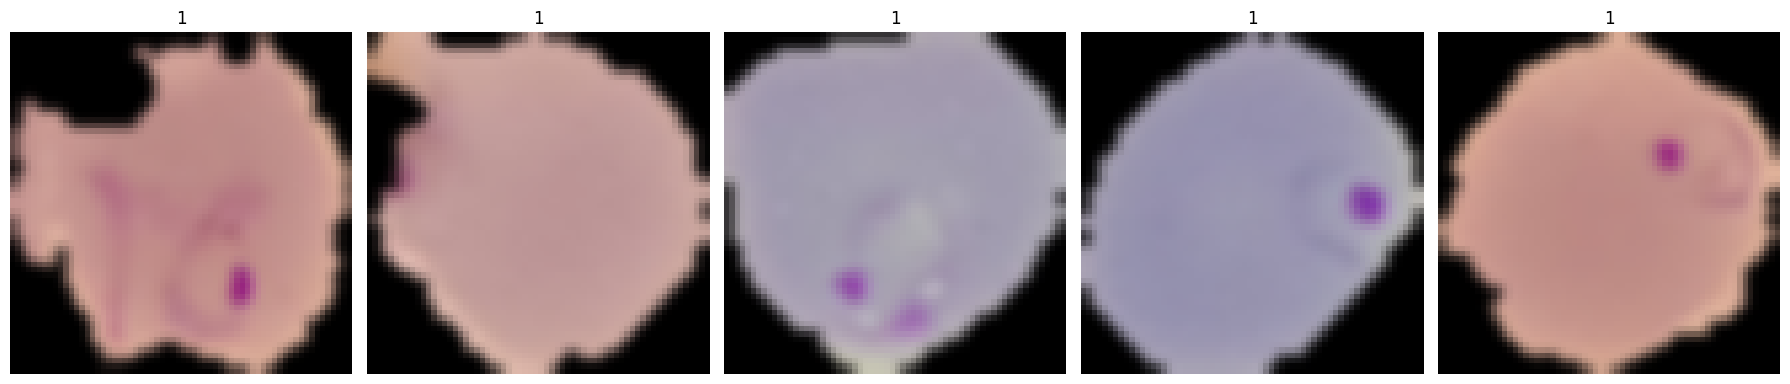

In [ ]:
# view randomly selected blurred images
viewimage = np.random.randint(1, 100, 5)

# create figure with subplots for visualization reusing previous code
fig, ax = plt.subplots(1, 5, figsize = (18, 18))
for t, i in zip(range(5), viewimage):
    Title = test_labels[i]
    ax[t].set_title(Title)
    ax[t].imshow(gbx_2[i])
    ax[t].set_axis_off()
    fig.tight_layout()

##**Observations and insights:**
* The Gaussian Blurring technique is **useful in noise-reduction** of images and pre-processing images where a model performs based upon **edge-detection**.  In this example, the Gaussian-blurred RBG images still retain information on the presence of malaria, but still may suffer for inconsistencies in image lighting and color region distinction.

* Gaussian Blurring may be useful in **reducing noise and dimensionality of the data for a faster and more robust model**, but **HSV conversion provides a clearer distinction between color regions** characteristic of parasitized cells. ** A combination of Gaussian Blur on HSV converted images may provide advantages of both techniques.**

### **Combine HSV and Gaussian Blurring Techniques**

In [ ]:
# check shape of HSV image array to confirm total number of previous converted HSV images
gfx.shape

(100, 64, 64, 3)

In [ ]:
# perform Gaussian Blur on HSV images

# create empty list to hold blurred HSVs
gbx_3 = []

# create for loop to convert and append blurred images
for i in np.arange(0, 100, 1):
    c = cv2.GaussianBlur(gfx[i], (5, 5), 0)   # define image source as 'gfx[i]', HSV image array created previously
    gbx_3.append(c)   # append blurred images to new list

# convert gbx_3 to array
gbx_3 = np.array(gbx_3)

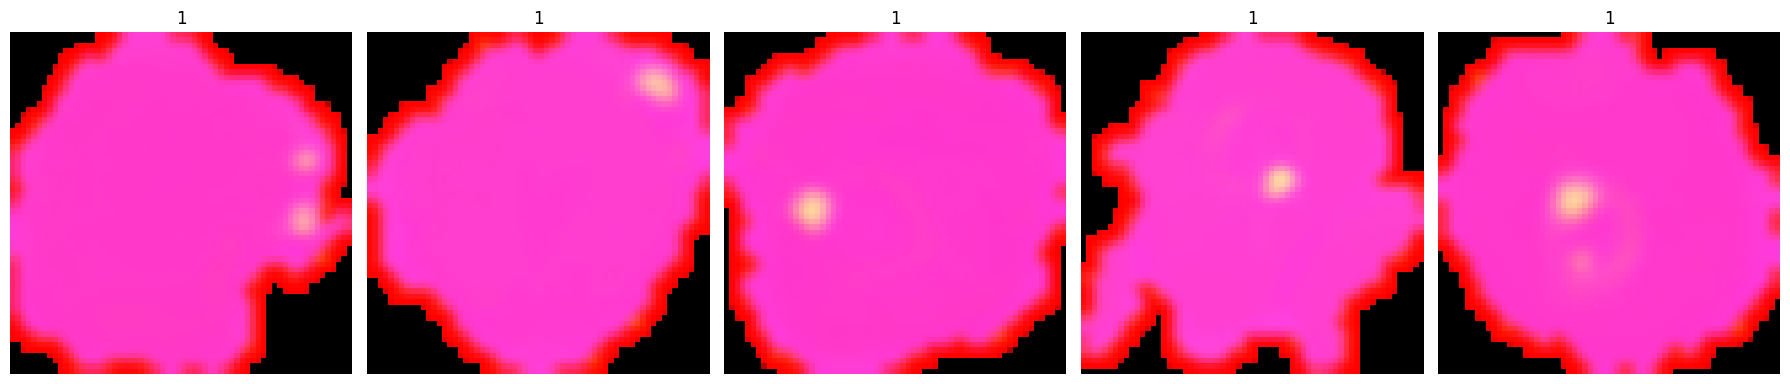

In [ ]:
# view randomly selected blurred images
viewimage = np.random.randint(1, 100, 5)

# create figure with subplots for visualization reusing previous code
fig, ax = plt.subplots(1, 5, figsize = (18, 18))
for t, i in zip(range(5), viewimage):
    Title = train_labels[i]
    ax[t].set_title(Title)
    ax[t].imshow(gbx_3[i])
    ax[t].set_axis_off()
    fig.tight_layout()

##**Observations and insights:**
* The combination of converting RBG images to HSV format and then performing the Gaussian Blurring technique may provide the most advantages for the model:
> * The input data set now has **clearer distinction between color regions within the cell, improved robustness against interference of background lighting present in the original RBG images, and one less dimension in the data** due to the HSV conversion.
> * The image set also has **reduced pixel noise and dimensionality** from Gaussian Blurring.

* From the images displayed above, it may be that a **model built upon edge-detection** would benefit from HSV/GB pre-processed images than the original RBG images.


# **CNN Model Building**

###<b> Importing Required Libraries, Clear Backend, Set Seed

In [ ]:
# import required libraries for building and training CNN model

import tensorflow as tf   # import TensorFlow library needed to build, train, and evaluate CNN model

from tensorflow.keras import backend    # used to clear backend to keep models separate and free up computer resources

from tensorflow.keras.utils import to_categorical   # used in one-hot encoding process for image labels

from tensorflow.keras.models import Sequential    # import Sequential model framework for CNN model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout     # import layers for building initial CNN model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint     # used when training model and checking performance

from random import shuffle    # used to randomize order within a list

In [ ]:
# clear backend to start fresh for first model
backend.clear_session()

In [ ]:
# set seed for random number generators (used for repeatability in model training)
np.random.seed(12)    # set Numpy seed

import random
random.seed(12)   # set standard Python seed

tf.random.set_seed(12)    # set TensorFlow seed

###<B>One Hot Encoding the train and test labels

In [ ]:
# one-hot encode train and test labels to categorical vectors
train_labels = to_categorical(train_labels,   # define list to encode as 'train_labels'
                              2)              # define number of classes as 2 (0 and 1)

test_labels = to_categorical(test_labels, 2)  # replace encoded list as 'test_labels'

## **Base Model**

####<b> Building the model

In [ ]:
# create Sequential model

model = Sequential()      # create variable 'model' defined as Sequential type model

# add layers to model
model.add(Conv2D(filters = 32,                # add first convultional layer with 32 output nodes
                 kernel_size = 2,             # define convolution filter size as 2 x 2
                 padding = 'same',            # define padding as 'same' so that output dimension are equal to input dimensions
                 activation = 'relu',         # set activation function to ReLU (0 - inf)
                 input_shape = (64, 64, 3)))  # define input shape of 4D array

model.add(MaxPooling2D(pool_size = 2))     # add MaxPooling2D layer to reduce dimensions, set pool_size to 2 x 2 window

model.add(Dropout(0.2))   # add Dropout layer to help prevent overfitting, randomly setting 20% of the inputs values to 0

model.add(Conv2D(filters = 32,          # add second convolutional layer with same hyperparameters as previous Conv2D layer
                 kernel_size = 2,
                 padding = 'same',
                 activation = 'relu'))

model.add(MaxPooling2D(pool_size = 2))    # add MaxPooling to reduce dimensions

model.add(Dropout(0.2))      # add Dropout layer with rate = 20% (0.20)

model.add(Conv2D(filters = 32, kernel_size = 2,             # add third convolutional layer with same hyperparameters as previous Conv2D layers
                 padding = 'same', activation = 'relu'))

model.add(MaxPooling2D(pool_size = 2))    # add MaxPooling to reduce dimensions
model.add(Dropout(0.2))                   # add Dropout layer to prevent overfitting

model.add(Flatten())    # add Flatten layer to prepare model for Dense layers by converting input layers into a 1D vector

model.add(Dense(512,                    # add first Dense layer with 512 output nodes
                activation = 'relu'))   # define activation function as ReLU

model.add(Dropout(0.4))   # add Dropout layer with rate = 40% (0.4)

model.add(Dense(2,                        # add final Dense layer with 2 outputs (uninfected or parasitized)
                activation = 'softmax'))  # set activation to SoftMax, which returns probability percentages

model.summary()   # return model summary statistics

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

####<b> Compiling the model

In [ ]:
# create code to compile model
model.compile(loss = 'binary_crossentropy',  # define loss function as 'binary_crossentropy' which measures (predicted - true) values - often used in binary classification problems
              optimizer = 'adam',            # define optimization technique as 'adam' (default learning_rate = 0.001)
              metrics = ['accuracy'])        # define performance metrics list as 'accuracy'

<b> Using Callbacks

In [ ]:
# add in EarlyStopping and ModelCheckpoint callbacks
callbacks = [EarlyStopping(monitor = 'val_loss',   # EarlyStopping callback will stop the model training process by monitoring a defined value (e.g. 'val_loss' or validation loss)
                           patience = 2),          # define number of epochs to wait for hyperparameter improvement (e.g. 'val_loss' does not improve within 2 epochs, model training will stop)

             ModelCheckpoint('.mdl_wts.hdf5',      # ModelCheckpoint callback will save model weights during training process to a defined location (e.g. '.mdl_wts.hdf5')
                             monitor = 'val_loss', # define hyperparameter to monitor and trigger save point for model weights
                             save_best_only = True)] # define saving parameter as 'save_best_only' = True, meaning that when validation loss improves, the model will save the weights associated with that 'best value'
                                                       # model will continuously overwrite saved model weights with 'best value' weights, model weights with 'val_loss' parameter less than previous epochs will not be saved

####<b> Fit and Train Model

In [ ]:
# Fit and train the model
history = model.fit(train_images,             # define training input data (features)
                    train_labels,             # define training data labels (target values)
                    batch_size = 32,          # define number of images in mini-batch training before updating model weights
                    callbacks = callbacks,    # define model callbacks as previously determined (EarlyStopping and ModelCheckpoint)
                    validation_split = 0.2,   # define percentage of training data set aside as validation data (0.2 = 20%)
                    epochs = 20,              # define number of iterations or "passes" through the model
                    verbose = 1)              # define style choice on how to represent model training progress (verbose = 1 - progress bar)

Epoch 1/20
624/624 [==============================] - 107s 169ms/step - loss: 0.5560 - accuracy: 0.7118 - val_loss: 0.2780 - val_accuracy: 0.9864
Epoch 2/20
624/624 [==============================] - 93s 149ms/step - loss: 0.1403 - accuracy: 0.9502 - val_loss: 0.1076 - val_accuracy: 0.9856
Epoch 3/20
624/624 [==============================] - 96s 153ms/step - loss: 0.0866 - accuracy: 0.9721 - val_loss: 0.1190 - val_accuracy: 0.9770
Epoch 4/20
624/624 [==============================] - 92s 147ms/step - loss: 0.0733 - accuracy: 0.9750 - val_loss: 0.0981 - val_accuracy: 0.9800
Epoch 5/20
624/624 [==============================] - 96s 153ms/step - loss: 0.0655 - accuracy: 0.9764 - val_loss: 0.0799 - val_accuracy: 0.9798
Epoch 6/20
624/624 [==============================] - 98s 157ms/step - loss: 0.0663 - accuracy: 0.9775 - val_loss: 0.0924 - val_accuracy: 0.9786
Epoch 7/20
624/624 [==============================] - 95s 153ms/step - loss: 0.0616 - accuracy: 0.9788 - val_loss: 0.0818 - val_a

####<b> Evaluating the model on test data

In [ ]:
# evaluate performance of base model on test data set
accuracy = model.evaluate(test_images,    # define test data images (features)
                          test_labels,    # define test data labels (target values)
                          verbose = 1)    # define model evaluation progress display as progress bar

82/82 [==============================] - 3s 33ms/step - loss: 0.0602 - accuracy: 0.9823


In [ ]:
# print test accuracy result in human-readable format
print('\n', 'Test_Accuracy_BaseModel:-', accuracy[1])


 Test_Accuracy_BaseModel:- 0.9823076725006104


<b> Plotting the confusion matrix

In [ ]:
# import required libraries
from sklearn.metrics import classification_report     # used to create classification report summary
from sklearn.metrics import confusion_matrix          # used to create confusion matrix

In [ ]:
# define variables for predicted values and true values
pred = model.predict(test_images)     # predict class probabilities from test images input data

pred = np.argmax(pred,      # find and convert highest predicted probability for each image in test set into an integer class label (e.g. 0 or 1)
                 axis = 1)         # define 'axis = 1' to find index of '1' in the one-hot encoded label

y_true = np.argmax(test_labels, axis = 1)   # find and convert true, or 'known', class labels from test data set

82/82 [==============================] - 4s 49ms/step


In [ ]:
# print classification report
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



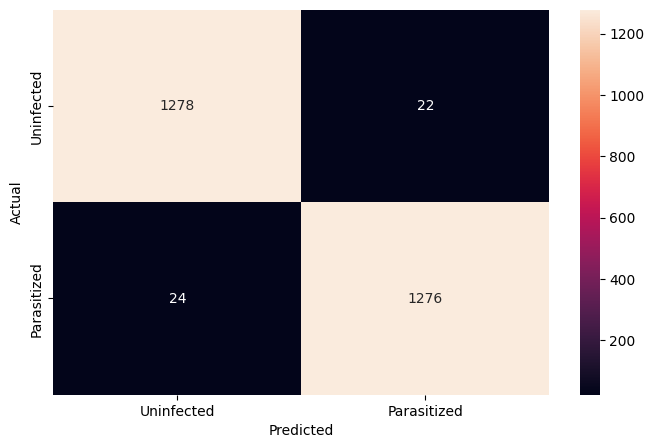

In [ ]:
# plot confusion matrix as heatmap
cm = confusion_matrix(y_true, pred)     # create 'cm' variable to store confusion matrix data

plt.figure(figsize = (8, 5))    # create parent figure for heatmap

sns.heatmap(cm,               # create heatmap using data from 'cm'
            annot = True,     # allows values from 'cm' to be displayed in each cross section of heatmap
            fmt = '.0f',      # format annotations as float with zero decimals
            xticklabels = ['Uninfected', 'Parasitized'],    # define heatmap x-axis labels
            yticklabels = ['Uninfected', 'Parasitized'])    # define heatmap y-axis labels

plt.xlabel('Predicted')   # add x-axis label to figure
plt.ylabel('Actual')      # add y-axis label to figure
plt.show()    # format to show parent figure labels

<b>Plotting the train and validation curves

In [ ]:
# define function to plot training and validation accuracies
def plot_accuracy(history):               # define function name, 'plot_accuracy', with user-defined input (e.g. 'history' variable with saved model information)

    N = len(history.history['accuracy'])  # define variable 'N', which is the count of all the elements in the 'accuracy' column in 'history'

    # create plot to visualize information
    plt.figure(figsize = (7, 7))    # create parent figure

    # create 'accuracy' data series and plot
    plt.plot(np.arange(0, N),               # create plot with x-axis from 0 to N
             history.history['accuracy'],   # define y-axis as values from 'accuracy' column
             label = 'train_accuracy',      # label data as 'train_accuracy'
             ls = '--')         # define line style of plot as dashed

    # create 'val_accuracy' data series and plot
    plt.plot(np.arange(0, N),
             history.history['val_accuracy'],   # replace 'accuracy' with 'val_accuracy' column
             label = 'val_accuracy',            # define label as 'val_accuracy'
             ls = '--')

    # set parent figure formatting parameters
    plt.title('Accuracy vs Epoch')    # define plot title
    plt.xlabel('Epochs')        # define plot x-axis
    plt.ylabel('Accuracy')      # define plot y-axis
    plt.legend(loc = 'lower right')    # define location of plot legend

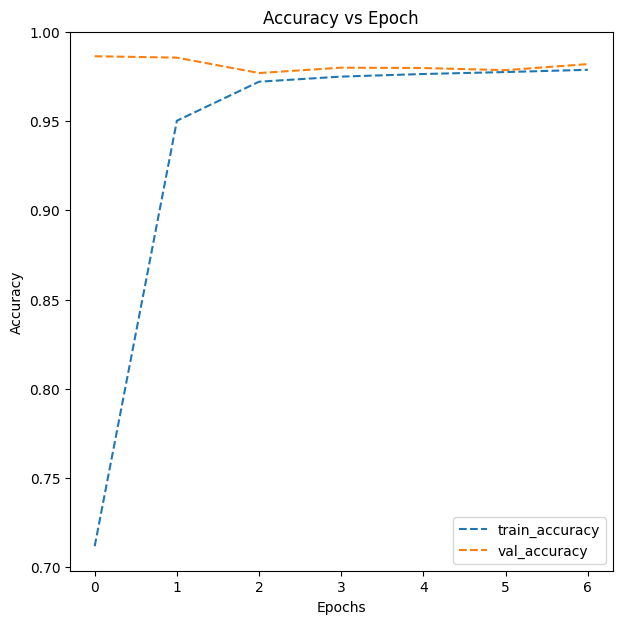

In [ ]:
# show plot on data from base model history
plot_accuracy(history)

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###**Observations and insights:**
* The base CNN model had surprisingly high performance on the RBG image test data set with an **average accuracy of 0.98**.
* Both precision and recall for each classification was evenly distributed, indicating **no bias is observed within the model on predicting infection status**.
* In the accuracy plot, the validation accuracy began high and remained consistent throughout each epoch until EarlyStopping was performed, which is in contrast with the training accuracy, which began at 0.71 and steadily climbed to 0.98.  The **high initial validation accuracy is unusual and may suggest that the model has a high capacity for learning the training data set quickly**.

## **Model 1**
Add additional Conv2D layer with larger kernel size (5 x 5) to capture high-level, or "global", features


####**Clear Backend, Set Seed**

In [ ]:
# clear backend session to start model with fresh resources
backend.clear_session()

In [ ]:
# set seed for random number generators (used for repeatability in model training)
np.random.seed(12)    # set Numpy seed

import random
random.seed(12)   # set standard Python seed

tf.random.set_seed(12)    # set TensorFlow seed

####<b> Building the Model

In [ ]:
# create Sequential model

model1 = Sequential()      # create variable 'model' defined as Sequential type model

# add layers to model
model1.add(Conv2D(filters = 32,                # add first convultional layer with 32 output nodes
                  kernel_size = 2,             # define convolution filter size as 2 x 2
                  padding = 'same',            # define padding as 'same' so that output dimension are equal to input dimensions
                  activation = 'relu',         # set activation function to ReLU (0 - inf)
                  input_shape = (64, 64, 3)))  # define input shape of 4D array
model1.add(MaxPooling2D(pool_size = 2))     # add MaxPooling2D layer to reduce dimensions, set pool_size to 2 x 2 window
model1.add(Dropout(0.2))   # add Dropout layer to help prevent overfitting, randomly setting 20% of the inputs values to 0

model1.add(Conv2D(filters = 32,          # add second convolutional layer with same hyperparameters as previous Conv2D layer
                  kernel_size = 2,
                  padding = 'same',
                  activation = 'relu'))
model1.add(MaxPooling2D(pool_size = 2))    # add MaxPooling to reduce dimensions
model1.add(Dropout(0.2))      # add Dropout layer with rate = 20% (0.20)

model1.add(Conv2D(filters = 32,
                  kernel_size = 2,             # add third convolutional layer with same hyperparameters as previous Conv2D layers
                  padding = 'same',
                  activation = 'relu'))
model1.add(MaxPooling2D(pool_size = 2))    # add MaxPooling to reduce dimensions
model1.add(Dropout(0.2))                   # add Dropout layer to prevent overfitting

model1.add(Conv2D(filters = 32,           # add fourth convolutional layer with increased kernel size to capture global/higher level features in image set
                  kernel_size = 5,        # define kernel size as 5 x 5
                  padding = 'same',       # set output dimensions same as input dimensions
                  activation = 'relu'))   # define activation layer as ReLU
model1.add(MaxPooling2D(pool_size = 2))      # reduce dimensions with MaxPooling layer
model1.add(Dropout(0.2))      # drop 20% of output nodes to zero

model1.add(Flatten())    # add Flatten layer to prepare model for Dense layers by converting input layers into a 1D vector

model1.add(Dense(512,                    # add first Dense layer with 512 output nodes
                 activation = 'relu'))   # define activation function as ReLU

model1.add(Dropout(0.4))   # add Dropout layer with rate = 40% (0.4)

model1.add(Dense(2,                        # add final Dense layer with 2 outputs (uninfected or parasitized)
                 activation = 'softmax'))  # set activation to SoftMax, which returns probability percentages

model1.summary()   # return model summary statistics

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

####<b> Compiling the model

In [ ]:
# compile model1 using same hyperparameters of base model
model1.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
# set up callbacks for EarlyStopping and ModelCheckpoint
callbacks1 = callbacks

####<b>Fit and Train the model

In [ ]:
# fit and train model1 to training data set
history1 = model1.fit(train_images,       # define image set (features)
                      train_labels,       # define corresponding label data set (target values)
                      batch_size = 32,    # define mini-batch size for updating model training weights
                      callbacks = callbacks1,   # define EarlyStopping and ModelCheckpoint callbacks
                      validation_split = 0.2,   # specify 20% split ratio for validation data set
                      epochs = 20,      # define number of passes through the model
                      verbose = 1)      # display training progress as progress bar

Epoch 1/20
624/624 [==============================] - 108s 170ms/step - loss: 0.4692 - accuracy: 0.7442 - val_loss: 0.0531 - val_accuracy: 0.9912
Epoch 2/20
624/624 [==============================] - 103s 165ms/step - loss: 0.0926 - accuracy: 0.9686 - val_loss: 0.0665 - val_accuracy: 0.9846
Epoch 3/20
624/624 [==============================] - 96s 154ms/step - loss: 0.0754 - accuracy: 0.9745 - val_loss: 0.0676 - val_accuracy: 0.9754


####<b> Evaluating the model

In [ ]:
# evaluate model1 performance on test data set
accuracy1 = model1.evaluate(test_images,    # define test image data set (features)
                            test_labels,    # define corresponding label data set (target values)
                            verbose = 1)    # display progress bar

82/82 [==============================] - 3s 34ms/step - loss: 0.0603 - accuracy: 0.9823


In [ ]:
print('\n', 'Test_Accuracy_Model1:-', accuracy1[1])


 Test_Accuracy_Model1:- 0.9823076725006104


<b> Plotting the confusion matrix

In [ ]:
# define variables for predicted values and true values
pred1 = model1.predict(test_images)     # predict class probabilities from test images input data

pred1 = np.argmax(pred1,      # find and convert highest predicted probability for each image in test set into an integer class label (e.g. 0 or 1)
                  axis = 1)         # define 'axis = 1' to find index of '1' in the one-hot encoded label

y_true = np.argmax(test_labels, axis = 1)   # find and convert true, or 'known', class labels from test data set

82/82 [==============================] - 4s 48ms/step


In [ ]:
# create classification report using true values and predicted values
cr1 = classification_report(y_true, pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



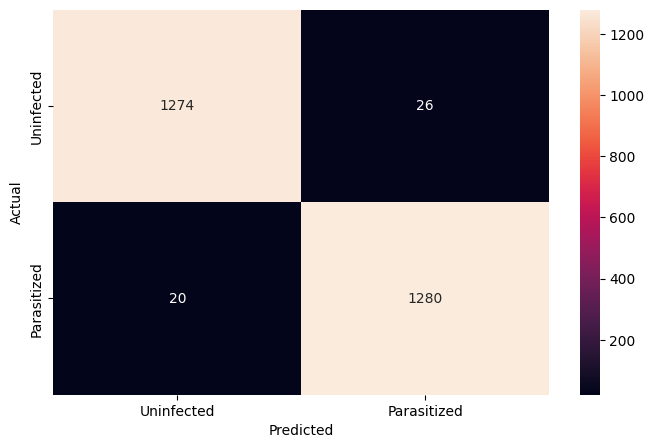

In [ ]:
# plot confusion matrix as heatmap
cm1 = confusion_matrix(y_true, pred1)     # create 'cm' variable to store confusion matrix data

plt.figure(figsize = (8, 5))    # create parent figure for heatmap

sns.heatmap(cm1,              # create heatmap using data from 'cm1'
            annot = True,     # allows values from 'cm1' to be displayed in each cross section of heatmap
            fmt = '.0f',      # format annotations as float with zero decimals
            xticklabels = ['Uninfected', 'Parasitized'],    # define heatmap x-axis labels
            yticklabels = ['Uninfected', 'Parasitized'])    # define heatmap y-axis labels

plt.xlabel('Predicted')   # add x-axis label to figure
plt.ylabel('Actual')      # add y-axis label to figure
plt.show()    # format to show parent figure labels

<b> Plotting the train and the validation curves

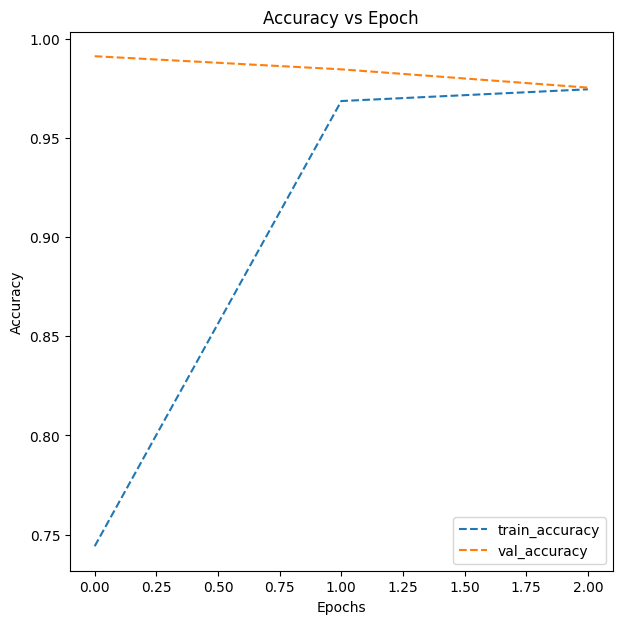

In [ ]:
# plot training and validation accuracies using previously defined function
plot_accuracy(history1)

###**Observations and insights:**
* Model 1 includes a **fourth Conv2D layer with a kernel size of 5 x 5** to test if bigger, or higher level, features could be learned by the model.  The original Base Model uses a kernel size of 2 x 2, which is useful in capturing local features, such as the presence of malaria within the RBC.
* Model 1 had comparable overall performance with the base CNN model, also acheiving an** average accuracy of 0.98** when evaluated on test data.
* Model 1 has comparable results with the Base Model in the confusion matrix as well, precision and recall for each classification was evenly distributed, indicating **no bias is observed within the model on predicting infection status**.
* In the accuracy plot, the **validation accuracy began high and slowly decreased throughout each epoch** until EarlyStopping was performed.  Although the model performed only 3 epochs, the continued trend of decreasing validation accuracy suggests that the **additional epochs may reveal that the model is beginning to overfit** the training data.

##**Model 2**
Add BatchNormalization and LeakyReLU Activation

####**Clear Backend, Set Seed**

In [ ]:
# clear backend for new model
backend.clear_session()

In [ ]:
# import required libraries
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

####<b> Building the Model

In [ ]:
# repeat code from base model, adding in BatchNormalization and LeakyReLU activation after Conv2D layers

# create Sequential model
model2 = Sequential()      # create variable 'model' defined as Sequential type model

# add layers to model
model2.add(Conv2D(filters = 32,                # add first convultional layer with 32 output nodes
                 kernel_size = 2,             # define convolution filter size as 2 x 2
                 padding = 'same',            # define padding as 'same' so that output dimension are equal to input dimensions
                 activation = 'relu',         # set activation function to ReLU (0 - inf)
                 input_shape = (64, 64, 3)))  # define input shape of 4D array

model2.add(BatchNormalization())    # add BatchNormalization layer

model2.add(LeakyReLU(alpha = 0.01))   # add LeakyReLU activation with alpha = 0.01 (allow 1% negative numbers into next layer)

model2.add(MaxPooling2D(pool_size = 2))     # add MaxPooling2D layer to reduce dimensions, set pool_size to 2 x 2 window
model2.add(Dropout(0.2))   # add Dropout layer to help prevent overfitting, randomly setting 20% of the inputs values to 0

model2.add(Conv2D(filters = 32,          # add second convolutional layer with same hyperparameters as previous Conv2D layer
                 kernel_size = 2,
                 padding = 'same',
                 activation = 'relu'))

model2.add(BatchNormalization())    # add BatchNormalization layer

model2.add(LeakyReLU(alpha = 0.01))   # add LeakyReLU activation with alpha = 0.01 (allow 1% negative numbers into next layer)

model2.add(MaxPooling2D(pool_size = 2))    # add MaxPooling to reduce dimensions
model2.add(Dropout(0.2))      # add Dropout layer with rate = 20% (0.20)

model2.add(Conv2D(filters = 32, kernel_size = 2,             # add third convolutional layer with same hyperparameters as previous Conv2D layers
                 padding = 'same', activation = 'relu'))

model2.add(BatchNormalization())    # add BatchNormalization layer

model2.add(LeakyReLU(alpha = 0.01))   # add LeakyReLU activation with alpha = 0.01 (allow 1% negative numbers into next layer)

model2.add(MaxPooling2D(pool_size = 2))    # add MaxPooling to reduce dimensions
model2.add(Dropout(0.2))                   # add Dropout layer to prevent overfitting
model2.add(Flatten())    # add Flatten layer to prepare model for Dense layers by converting input layers into a 1D vector

model2.add(Dense(512,                    # add first Dense layer with 512 output nodes
                activation = 'relu'))   # define activation function as ReLU

model2.add(Dropout(0.4))   # add Dropout layer with rate = 40% (0.4)

model2.add(Dense(2,                        # add final Dense layer with 2 outputs (uninfected or parasitized)
                activation = 'softmax'))  # set activation to SoftMax, which returns probability percentages

model2.summary()   # return model summary statistics

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4

####<b>Compiling the model

In [ ]:
# repeat code to compile model2
model2.compile(loss = 'binary_crossentropy',     # define loss function as 'binary_crossentropy' which measures (predicted - true) values - often used in binary classification problems
               optimizer = 'adam',               # define optimization technique as 'adam' (default learning_rate = 0.001)
               metrics = ['accuracy'])           # define performance metrics list as 'accuracy'

<b> Using callbacks

In [ ]:
# repeat EarlyStopping and ModelCheckpoint callbacks from base model
callbacks2 = [EarlyStopping(monitor = 'val_loss',          # EarlyStopping callback will stop the model training process by monitoring a defined value (e.g. 'val_loss' or validation loss)
                            patience = 2),                 # define number of epochs to wait for hyperparameter improvement (e.g. 'val_loss' does not improve within 2 epochs, model training will stop)

              ModelCheckpoint('.mdl_wts.hdf5',             # ModelCheckpoint callback will save model weights during training process to a defined location (e.g. '.mdl_wts.hdf5')
                              monitor = 'val_loss',        # define hyperparameter to monitor and trigger save point for model weights
                              save_best_only = True)]      # define saving parameter as 'save_best_only' = True, meaning that when validation loss improves, the model will save the weights associated with that 'best value'
                                                                # model will continuously overwrite saved model weights with 'best value' weights, model weights with 'val_loss' parameter less than previous epochs will not be saved

####<b>Fit and train the model

In [ ]:
# Fit and train the model
history2 = model2.fit(train_images,             # define training input data (features)
                     train_labels,             # define training data labels (target values)
                     batch_size = 32,          # define number of images in mini-batch training before updating model weights
                     callbacks = callbacks2,    # define model callbacks as previously determined (EarlyStopping and ModelCheckpoint)
                     validation_split = 0.2,   # define percentage of training data set aside as validation data (0.2 = 20%)
                     epochs = 20,              # define number of iterations or "passes" through the model
                     verbose = 1)              # define style choice on how to represent model training progress (verbose = 1 - progress bar)

Epoch 1/20
624/624 [==============================] - 166s 261ms/step - loss: 0.2851 - accuracy: 0.8881 - val_loss: 0.2001 - val_accuracy: 0.9958
Epoch 2/20
624/624 [==============================] - 163s 261ms/step - loss: 0.0968 - accuracy: 0.9680 - val_loss: 0.0637 - val_accuracy: 0.9892
Epoch 3/20
624/624 [==============================] - 160s 257ms/step - loss: 0.0749 - accuracy: 0.9763 - val_loss: 0.1675 - val_accuracy: 0.9445
Epoch 4/20
624/624 [==============================] - 157s 252ms/step - loss: 0.0671 - accuracy: 0.9773 - val_loss: 0.1752 - val_accuracy: 0.9459


####<b>Evaluating the model

In [ ]:
# evaluate model on test data set and calculate accuracy
accuracy2 = model2.evaluate(test_images,    # define test data images (features)
                            test_labels,    # define test data labels (target values)
                            verbose = 1)    # define model evaluation progress display as progress bar

82/82 [==============================] - 9s 100ms/step - loss: 0.0867 - accuracy: 0.9754


In [ ]:
print('\n', 'Test_Accuracy_Model2:-', accuracy2[1])


 Test_Accuracy_Model2:- 0.9753845930099487


<b> Generate the classification report and confusion matrix

In [ ]:
# create prediction variables for classification report and confusion matrix
pred2 = model2.predict(test_images)     # predict classification probabilites for each test image using Model 2
pred2 = np.argmax(pred2, axis = 1)       # convert probabilities into one-hot encoded vectors

y_true = np.argmax(test_labels, axis = 1)   # repeat code to convert known test labels into one-hot encoded vectors

82/82 [==============================] - 9s 108ms/step


In [ ]:
# create classification report and print summary as human-readable
cr2 = classification_report(y_true, pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1300
           1       0.98      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



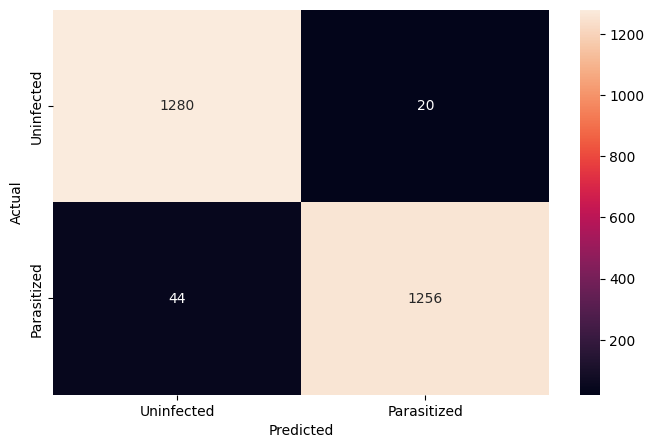

In [ ]:
# create confusion matrix and plot as heatmap
cm2 = confusion_matrix(y_true, pred2)

plt.figure(figsize = (8, 5))    # create parent figure for heatmap

sns.heatmap(cm2,               # create heatmap using data from 'cm2'
            annot = True,     # allows values from 'cm' to be displayed in each cross section of heatmap
            fmt = '.0f',      # format annotations as float with zero decimals
            xticklabels = ['Uninfected', 'Parasitized'],    # define heatmap x-axis labels
            yticklabels = ['Uninfected', 'Parasitized'])    # define heatmap y-axis labels

plt.xlabel('Predicted')   # add x-axis label to figure
plt.ylabel('Actual')      # add y-axis label to figure
plt.show()    # format to show parent figure labels

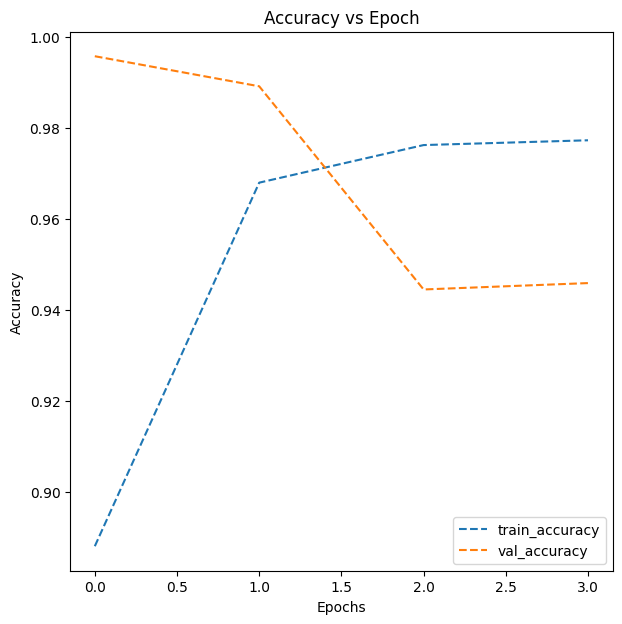

In [ ]:
# plot accuracies using previously defined function
plot_accuracy(history2)


###**Observations and insights**:
* Model 2 converged faster than the Base Model, converging in 4 epochs vs 7 epochs, but the **accuracy plot suggests that the model may begin to overfit** the data since validation accuracy was observed to drop lower than the training accuracy.
* Model 2 returned a **similar test accuracy** to the Base Model and Model 1, with an F-1 score of 0.98.
* It is observed in the confusion matrix, that a slightly **higher number of false negatives appear in Model 2** (predicted uninfected when actually infected).  In comparison with matrices from Base Model and Model 1, **the ratio of false negatives to false positives is almost doubled in Model 2**.  While the absolute number of false negative cases is small, this can pose **serious health consequences to parasitized individuals who may not receive the necessary healthcare within a timely manner**.

##**Model 3**
Explore Image Data Augmentation

#### **Clear Backend, Set Seed, and Generate Augmented Images**


In [ ]:
# always clear backend to free up computer resources and start "fresh" for next model
backend.clear_session()

In [ ]:
# set seed for random number generators (used for repeatability in model training)
np.random.seed(12)    # set Numpy seed

import random
random.seed(12)   # set standard Python seed

tf.random.set_seed(12)    # set TensorFlow seed

In [ ]:
# import required libraries
from sklearn.model_selection import train_test_split  # required to split training data set images into training and validation sets
from tensorflow.keras.preprocessing.image import ImageDataGenerator     # required to generate new images in data augmentation preprocessing

In [ ]:
# split training images and labels data sets into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images,         # define 'train_images' as data set for input image data
                                                  train_labels,         # define 'train_labels' as corresponding classification labels for input images
                                                  test_size = 0.2,      # define fraction of data used as validation/testing data (0.2 = 20%)
                                                  random_state = 12)    # define seed number to ensure repeatibility in data split

In [ ]:
# confirm shape of new image data sets
print('The shape of the X_train data set is:', X_train.shape)
print('The shape of the X_val data set it:', X_val.shape)

The shape of the X_train data set is: (19966, 64, 64, 3)
The shape of the X_val data set it: (4992, 64, 64, 3)


#####<b> Use Image Data Generator

In [ ]:
# use ImageDataGenerator to generate new images from training and validation data sets
train_datagen = ImageDataGenerator()    # use default settings in ImageDataGenerator method for training data, recommended settings in low-code notebook returns streaking affects in images that obscure cell shape and dimensions

val_datagen = ImageDataGenerator()    # use default settings in ImageDataGenerator method for validation data

In [ ]:
# generate batches of augmented images using '.flow()' function
train_generator = train_datagen.flow(x = X_train,       # define images (features)
                                     y = y_train,       # define corresponding labels (target values)
                                     batch_size = 64,   # define how many images are generated in each iteration of the generator
                                     seed = 12,         # set seed for repeatability
                                     shuffle = True)    # allows random shuffling of image order before each epoch

In [ ]:
# repeat code for validation data set
val_generator = val_datagen.flow(x = X_val,         # define 'X_val' as input image data set
                               y = y_val,         # define corresponding labels as 'y_val' data set
                               batch_size = 64,
                               seed = 12,
                               shuffle = True)

#####<B>Visualizing Augmented images

In [ ]:
# retrieve batch of images and corresponding labels from 'train_generator' for visualization
images, labels = next(train_generator)    # use 'next()' function to pull data batched from generator
                                          # 'images' will be stored as np.array, 'labels' stored as one-hot encoded vectors

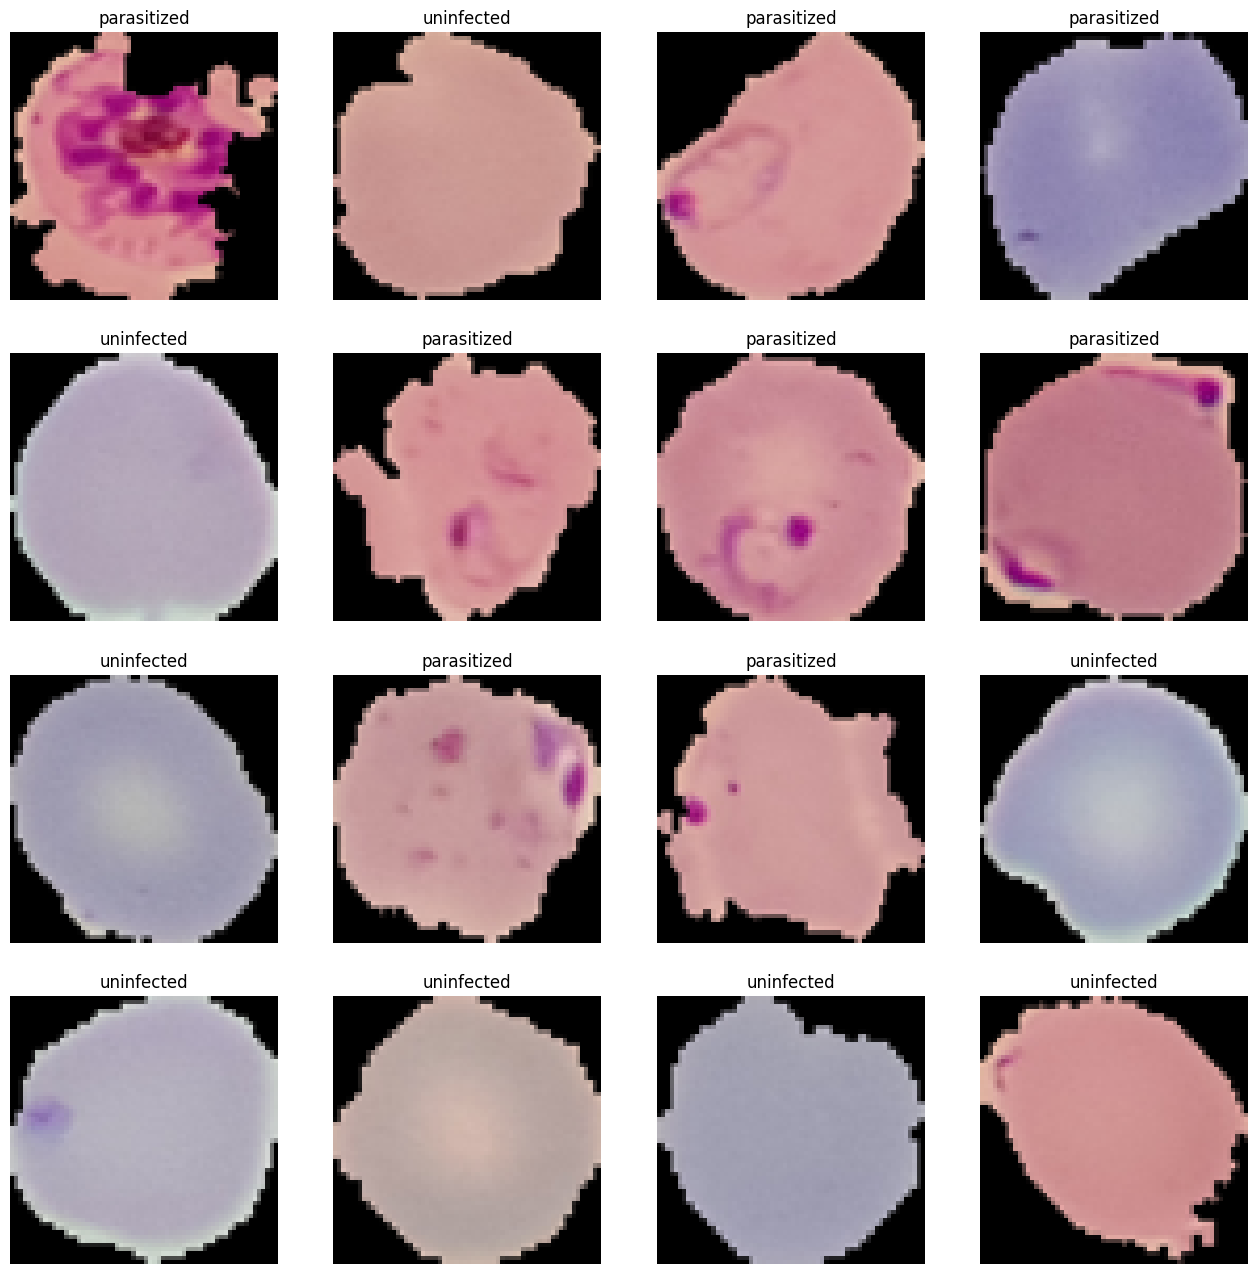

In [ ]:
# create plot to visualize pulled images in training data

# create parent figure with 16 subplots
fig, axes = plt.subplots(4,    # number of rows
                         4,    # number of columns
                         figsize = (16, 8))   # size subplot image

fig.set_size_inches(16, 16)   # define size of parent plot

# create for loop to populate subplots with images
for (image, label, ax) in zip(images, labels, axes.flatten()):    # scans each image, corresponding label, and subplot location

    ax.imshow(image)    # code that shows the image in a subplot

    # adds subplot titles to each subplot image
    if label[1] == 1:                 # based upon binary classification established in the previous code
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')

    ax.axis('off')    # remove subplot label ticks

#####**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



###**Observations and insights**:
* Within the randomly generated images and corresponding labels from the training data set, **some images are labeled as 'uninfected' when there is a distinct darker color region observable by the human eye**. RBCs that contain darker regions within the cell traditionally indicate that the cell is 'parasitized'.  Incorrectly labeled data from the training data set may affect model performance (e.g. row 3 column 0, and row 3 column 3).
* Previous data augmentation experiments **changing the zoom and rotation hyperparameter led to images that contained significant "streaks**" of cell color across the image, which significantly changed the overall shape of the RBC within the image. These **hyperparameters were set to default to preserve the integrity of the cell image for the model**.

####<b>Building the Model

In [ ]:
# repeat code from Model 2, specifying Adam learning rate as 0.001

# create Sequential model
model3 = Sequential()      # create variable 'model' defined as Sequential type model

# add layers to model
model3.add(Conv2D(filters = 32,                # add first convultional layer with 32 output nodes
                 kernel_size = 2,             # define convolution filter size as 2 x 2
                 padding = 'same',            # define padding as 'same' so that output dimension are equal to input dimensions
                 activation = 'relu',         # set activation function to ReLU (0 - inf)
                 input_shape = (64, 64, 3)))  # define input shape of 4D array
model3.add(BatchNormalization())    # add BatchNormalization layer
model3.add(LeakyReLU(alpha = 0.01))   # add LeakyReLU activation with alpha = 0.01 (allow 1% negative numbers into next layer)
model3.add(MaxPooling2D(pool_size = 2))     # add MaxPooling2D layer to reduce dimensions, set pool_size to 2 x 2 window
model3.add(Dropout(0.2))   # add Dropout layer to help prevent overfitting, randomly setting 20% of the inputs values to 0

model3.add(Conv2D(filters = 32,          # add second convolutional layer with same hyperparameters as previous Conv2D layer
                 kernel_size = 2,
                 padding = 'same',
                 activation = 'relu'))
model3.add(BatchNormalization())    # add BatchNormalization layer
model3.add(LeakyReLU(alpha = 0.01))   # add LeakyReLU activation with alpha = 0.01 (allow 1% negative numbers into next layer)
model3.add(MaxPooling2D(pool_size = 2))    # add MaxPooling to reduce dimensions
model3.add(Dropout(0.2))      # add Dropout layer with rate = 20% (0.20)

model3.add(Conv2D(filters = 32, kernel_size = 2,             # add third convolutional layer with same hyperparameters as previous Conv2D layers
                 padding = 'same', activation = 'relu'))
model3.add(BatchNormalization())    # add BatchNormalization layer
model3.add(LeakyReLU(alpha = 0.01))   # add LeakyReLU activation with alpha = 0.01 (allow 1% negative numbers into next layer)
model3.add(MaxPooling2D(pool_size = 2))    # add MaxPooling to reduce dimensions
model3.add(Dropout(0.2))                   # add Dropout layer to prevent overfitting
model3.add(Flatten())    # add Flatten layer to prepare model for Dense layers by converting input layers into a 1D vector

model3.add(Dense(512,                    # add first Dense layer with 512 output nodes
                activation = 'relu'))   # define activation function as ReLU
model3.add(Dropout(0.4))   # add Dropout layer with rate = 40% (0.4)

model3.add(Dense(2,                        # add final Dense layer with 2 outputs (uninfected or parasitized)
                activation = 'softmax'))  # set activation to SoftMax, which returns probability percentages

model3.summary()   # return model summary statistics

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        416       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)       

#### **Compile the Model**

In [ ]:
# compile Model 3 with defined Adam learning rate
adam3 = tf.keras.optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'binary_crossentropy',
               optimizer = adam3,
               metrics = ['accuracy'])

<b>Using Callbacks

In [ ]:
# repeat EarlyStopping and ModelCheckpoint callbacks from base model
callbacks3 = [EarlyStopping(monitor = 'val_loss',          # EarlyStopping callback will stop the model training process by monitoring a defined value (e.g. 'val_loss' or validation loss)
                            patience = 2),                 # define number of epochs to wait for hyperparameter improvement (e.g. 'val_loss' does not improve within 2 epochs, model training will stop)

              ModelCheckpoint('.mdl_wts.hdf5',             # ModelCheckpoint callback will save model weights during training process to a defined location (e.g. '.mdl_wts.hdf5')
                              monitor = 'val_loss',        # define hyperparameter to monitor and trigger save point for model weights
                              save_best_only = True)]      # define saving parameter as 'save_best_only' = True, meaning that when validation loss improves, the model will save the weights associated with that 'best value'
                                                                # model will continuously overwrite saved model weights with 'best value' weights, model weights with 'val_loss' parameter less than previous epochs will not be saved

####<b> Fit and Train the model

In [ ]:
# fit and train Model 3
history3 = model3.fit(train_generator,          # define image data set as augmented data from 'train_generator'
                      validation_data = val_generator,    # define validation data set as augmented data from 'val_generator'
                      batch_size = 32,          # define batch size consistent with previous models
                      callbacks = callbacks3,   # specify EarlyStopping and ModelCheckpoint callbacks
                      epochs = 20,       # define epochs
                      verbose = 1)       # define training progress display as progress bar

Epoch 1/20
312/312 [==============================] - 152s 479ms/step - loss: 0.4901 - accuracy: 0.7791 - val_loss: 0.6296 - val_accuracy: 0.8001
Epoch 2/20
312/312 [==============================] - 150s 480ms/step - loss: 0.1414 - accuracy: 0.9507 - val_loss: 0.1679 - val_accuracy: 0.9633
Epoch 3/20
312/312 [==============================] - 148s 473ms/step - loss: 0.0992 - accuracy: 0.9676 - val_loss: 0.1292 - val_accuracy: 0.9623
Epoch 4/20
312/312 [==============================] - 148s 474ms/step - loss: 0.0861 - accuracy: 0.9716 - val_loss: 0.0789 - val_accuracy: 0.9728
Epoch 5/20
312/312 [==============================] - 151s 485ms/step - loss: 0.0752 - accuracy: 0.9743 - val_loss: 0.0819 - val_accuracy: 0.9734
Epoch 6/20
312/312 [==============================] - 149s 477ms/step - loss: 0.0689 - accuracy: 0.9762 - val_loss: 0.0682 - val_accuracy: 0.9786
Epoch 7/20
312/312 [==============================] - 149s 477ms/step - loss: 0.0660 - accuracy: 0.9779 - val_loss: 0.0753 -

####<B>Evaluating the model

<b>Plot the train and validation accuracy

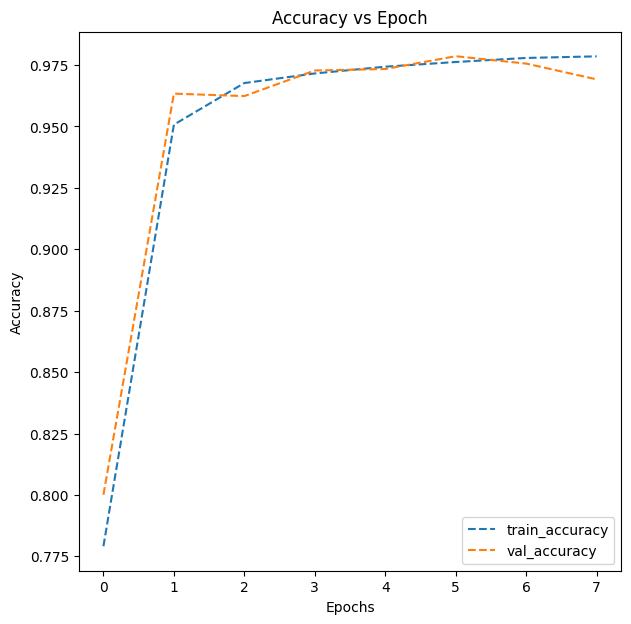

In [ ]:
# plot accuracies using previously defined function
plot_accuracy(history3)

In [ ]:
# evaluate model3 on test data set
accuracy3 = model3.evaluate(test_images,
                            test_labels,
                            verbose = 1)

82/82 [==============================] - 4s 51ms/step - loss: 0.0716 - accuracy: 0.9792


In [ ]:
print('\n', 'Test_Accuracy_Model3:-', accuracy3[1])


 Test_Accuracy_Model3:- 0.9792307615280151


<B>Plotting the classification report and confusion matrix

In [ ]:
# create prediction variables for classification report and confusion matrix
pred3 = model3.predict(test_images)     # predict classification probabilites for each test image using Model 3
pred3 = np.argmax(pred3, axis = 1)       # convert probabilities into one-hot encoded vectors

y_true = np.argmax(test_labels, axis = 1)   # repeat code to convert known test labels into one-hot encoded vectors

82/82 [==============================] - 4s 45ms/step


In [ ]:
# create classification report and print as human-readable text
cr3 = classification_report(y_true, pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1300
           1       0.99      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



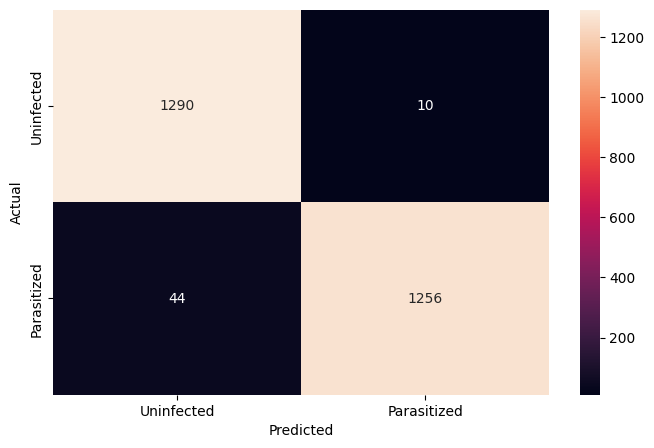

In [ ]:
# create confusion matrix and plot as heatmap
cm3 = confusion_matrix(y_true, pred3)

plt.figure(figsize = (8, 5))    # create parent figure for heatmap

sns.heatmap(cm3,               # create heatmap using data from 'cm3'
            annot = True,     # allows values from 'cm' to be displayed in each cross section of heatmap
            fmt = '.0f',      # format annotations as float with zero decimals
            xticklabels = ['Uninfected', 'Parasitized'],    # define heatmap x-axis labels
            yticklabels = ['Uninfected', 'Parasitized'])    # define heatmap y-axis labels

plt.xlabel('Predicted')   # add x-axis label to figure
plt.ylabel('Actual')      # add y-axis label to figure
plt.show()    # format to show parent figure labels

###**Observations and insights:**

* The performance of Model 3 is similar to that of Model 2 and previous models, with an **average accuracy of 0.98**.
* One distinction in Model 3 and compared to previous models, is that Model 3 shows a slight improvement to the sensitvity of identifying parasitized cells, indicating that **Model 3 predict less false positives over all**.  This translates into less resouces consumed by healthcare professionals when confirming malaria via trained professional or treating false positve malaria cases.
* Model 3, same as Model 2, is observed to **show bias in predicting false negatives over false positives**, which can **severely impact timely treatment for patients with undiagnosed malaria and accurate monitoring of the spread of the disease**.

## **Model 4**
Explore Transfer Learning via Pre-trained model (VGG16)

####<b> Import Transfer Learning Model

In [ ]:
# clear backend before beginning new model
backend.clear_session()

In [ ]:
# fix random seed numbers
np.random.seed(12)      # fix Numpy seed
random.seed(12)         # fix standard Py seed
tf.random.set_seed(12)  # fix Tensorflow seed

In [ ]:
# import required libraries for VGG16
from tensorflow.keras.applications.vgg16 import VGG16     # import VGG16 model architecture
from tensorflow.keras import Model        # 'Model' allows for customizing NNs

In [ ]:
# create VGG16 model
vgg = VGG16(include_top = False,          # set 'include_top' to False since image set has only 2 classifications
            weights = 'imagenet',         # use default 'imagenet' weights from pre-trained model
            input_shape = (64, 64, 3))    # define input shape of array

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# print VGG16 model summary
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

####<b> Customize Pre-Trained Model

In [ ]:
# modify VGG16 model with custom transfer and output layers

# define transfer layer in VGG16 model
transfer_layer = vgg.get_layer('block5_pool')   # define transfer layer as 'block5_pool' layer in VGG16 model

In [ ]:
# fix VGG16 model to prevent pre-trained weights from changing during model training
vgg.trainable = False

In [ ]:
# flatten transfer layer to create 1D vector for future Dense layer(s); connects VGG16 model layers to customized classification layers
X = Flatten()(transfer_layer.output)    # take output of 'block5_pool' layer and flattens it to 1D vector
X = Dense(256, activation = 'relu')(X)  # modify 'X' to include Dense layer with 256 output nodes and ReLU activation
X = Dropout(0.3)(X)       # modify 'X' to include Dropout layer with 30% dropout
X = BatchNormalization()(X)     # modify 'X' to include Batch Normalization layer to increase model capacity

In [ ]:
# add final Dense layer with 64 outputs and change variable name to 'pred4'
pred4 = Dense(2, activation = 'softmax')(X)

In [ ]:
# initialize the new model
model4 = Model(vgg.input, pred4)

####<b>Compiling Model

In [ ]:
# compile model4
adam4 = tf.keras.optimizers.Adam(learning_rate = 0.001)

model4.compile(loss = 'binary_crossentropy',
               optimizer = adam4,
               metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
# repeat callbacks from previous models
callbacks4 = callbacks3

####<b>Fit and Train the model

In [ ]:
# fit and train model for 10 epochs
history4 = model4.fit(train_images,   # define input feature data set
                      train_labels,   # define corresponding classification label data set
                      epochs = 10,    # set epochs = 10
                      callbacks = callbacks4,   # specify EarlyStopping and ModelCheckpoint callbacks
                      batch_size = 32,    # define batch size
                      validation_split = 0.2,     # define 20% split for data validation
                      verbose = 1)    # specify to display progress bar

Epoch 1/10
624/624 [==============================] - 1312s 2s/step - loss: 0.2232 - accuracy: 0.9129 - val_loss: 0.2667 - val_accuracy: 0.9065
Epoch 2/10
624/624 [==============================] - 1306s 2s/step - loss: 0.1805 - accuracy: 0.9294 - val_loss: 0.1087 - val_accuracy: 0.9696
Epoch 3/10
624/624 [==============================] - 1304s 2s/step - loss: 0.1741 - accuracy: 0.9337 - val_loss: 0.2435 - val_accuracy: 0.9197
Epoch 4/10
624/624 [==============================] - 1282s 2s/step - loss: 0.1710 - accuracy: 0.9334 - val_loss: 0.3872 - val_accuracy: 0.8616


<b>Plot the train and validation accuracy

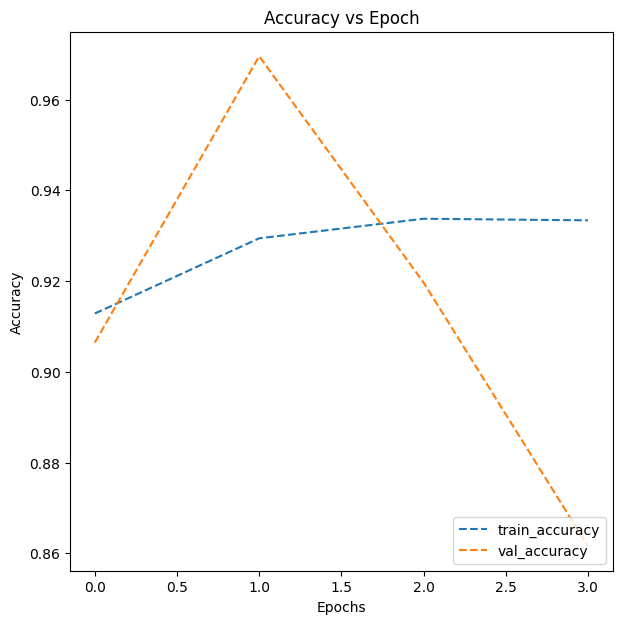

In [ ]:
# plot accuracies using previously defined function
plot_accuracy(history4)

###**Observations and insights:**

*   Over the 4 epochs, the validation accuracy begins to decrease and dip below the training accuracy just after 1 epoch, indicating that Model 4 has begun to overfit the training data.  **This may indicate that Model 4 is not very robust, becoming too quickly atuned to the noise within the training data**.

####<b> Evaluating the model

In [ ]:
# evaluate model3 on test data set
accuracy4 = model4.evaluate(test_images,
                            test_labels,
                            verbose = 1)

82/82 [==============================] - 175s 2s/step - loss: 0.2213 - accuracy: 0.9131


In [ ]:
print('\n', 'Test_Accuracy_Model4:-', accuracy4[1])


 Test_Accuracy_Model4:- 0.9130769371986389


<b>Plotting the classification report and confusion matrix

In [ ]:
# create prediction variables for classification report and confusion matrix
pred4 = model4.predict(test_images)     # predict classification probabilites for each test image using Model 4
pred4 = np.argmax(pred4, axis = 1)       # convert probabilities into one-hot encoded vectors

y_true = np.argmax(test_labels, axis = 1)   # repeat code to convert known test labels into one-hot encoded vectors

82/82 [==============================] - 141s 2s/step


In [ ]:
# create classification report and print as human-readable text
cr4 = classification_report(y_true, pred4)
print(cr4)

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1300
           1       0.87      0.98      0.92      1300

    accuracy                           0.91      2600
   macro avg       0.92      0.91      0.91      2600
weighted avg       0.92      0.91      0.91      2600



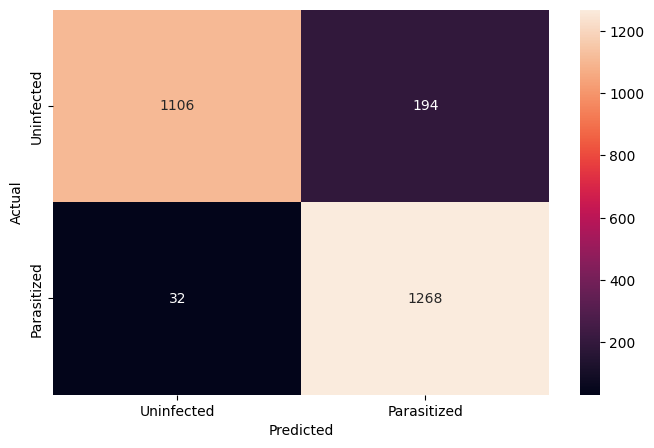

In [ ]:
# create confusion matrix and plot as heatmap
cm4 = confusion_matrix(y_true, pred4)

plt.figure(figsize = (8, 5))    # create parent figure for heatmap

sns.heatmap(cm4,              # create heatmap using data from 'cm4'
            annot = True,     # allows values from 'cm' to be displayed in each cross section of heatmap
            fmt = '.0f',      # format annotations as float with zero decimals
            xticklabels = ['Uninfected', 'Parasitized'],    # define heatmap x-axis labels
            yticklabels = ['Uninfected', 'Parasitized'])    # define heatmap y-axis labels

plt.xlabel('Predicted')   # add x-axis label to figure
plt.ylabel('Actual')      # add y-axis label to figure
plt.show()    # format to show parent figure labels

###**Observations and Conclusions drawn from the final model**:
> * From the classification report,  Model 4 has **high precision** (0.97) for indentifying uninfected cells ('0') and **high recall** (0.98) for parasitized cells ('1').
> * The confusion matrix supports the observations concluded from the classification report, and highlights that **Model 4 is biased to predict false positive results, predicting parasitized cells that are actually uninfected cells**.  In the context of healthcare, **a positive malaria results would likely warrant a second review of the RBCs by a trained professional**, which may override the model results.


#**Milestone Technical Insights**


###**Refined insights**:

* Convolutional Neural Networks (CNNS) are a powerful tool to analyze and extract relevant features from image data of all kinds (RBG, grayscale, HSV).  The filtering technique in convolutional layers allows relatively quick analysis of high dimensionality data sets that can be used to build classificaiton models for a variety of images.
* Image data augmentation was observed to improve the robustness of the data by reducing the occurance of early overfitting during the training process, and the model's confusion matrix revealed that Model 3 has the lowest occurances of false positives, indicating the highest sensitivity for detecting and predicting parasitized cells.  However, in these models, data augmentation was not shown to improve the occurance of false negatives, which can impact global and local community health.
* Using transfer learning to pre-populate model training weights can be a useful tool in extracting and learning features in a data set with lots of variation, however in this example case, the goal was to develop a model to predict the binary classification of images.  The performance metrics of the modifed VGG16 model indicated the highest percentage of false positives and early overfitting of the training data.


###**Comparison of various techniques and their relative performance**:

* When comparing the classification report and confusion matrices of each of the five models (Base Model, Model 1, Model 2, Model 3, Model 4):
> * The Base Model and Model 1 have comparable performance.  Both have an F-1 score of 0.98, and the same precision and recall scores for both classifications.  The difference between the two models that Model 1 converges quicker, which could possibly be attributed to the additional Conv2D layer with larger kernel size.
> * Model 2 introduced BatchNormalization layers and LeakyReLU activation layers after each convolutional layer to test if model performance could be improved.  it was observed that Model 2 actually become less sensitive to detecting parasitized cells, leading to an increase in false negative predictions.  False negative occurances in disease detection can play a signifcant impact in timely diagnosis and treatment for patients as well as contribute to the spread of disease.  In this scenario, Model 2 would not be the recommended choice, even though the overall accuracy of the model is comparable to Base Model and Model 1.
> * Model 3 explored the use of Image data augmentation to test whether the robustness and capacity of the model could be improved with increased variation in the training data set.  This model did see a reduction in false positive predictions, which can save time and resources in the medical community for true positive patients.  Additionally, the plot of accuracies indicate the that occurance of early overfitting was delayed in comparison to other models that engaged EarlyStopping after 3-4 epochs.
> * Model 4 tested whether transfer learning from pre-trained models would improve model performance, using the VGG16 model for image classification.  Of all the models tested, this model performed the worst, with an average accuracy of 0.91 and the highest occurance of false positives.  This may be due the hyperparameters set in the model building process, or it may be that the pre-trained model weights perform better on extremely diverse image data sets with a larger range of classifications instead of binary classification.


* Within the scope for further improvement, customization for Model 3 should be explored to decrease the occurances of false negatives.  This could be done by remove the BatchNormalization layers (similar to Base Model and Model 1 CNN structure) and testing the model performance.  Another suggestion to use a different pre-processing technique on the input image data set.  In this notebook, a brief exploration was performed on convert RBG images to HSV and then applying Gaussian Blurring to further enhance the distinction between different color regions within the RBC.  Model 3 could be evaluted using Image data augmented HSV/GB images to test the performance of combining these three techniques.


###**Proposal for the final solution design**:

* Of all the models, Model 3 is the suggested model to adopt in this binary classification problem due to the improved robustness during training and lower occurance of false positives.  The improved robustness from data augmentation has the highest potential for successful predictions of new RBC images generated from the community and health professionals, and the high sensitivity of the model will help facilitate the accurate allocation of medical resources to the appropriate communities.

#<b> Executive Summary

##**Overall Key Findings**:

1.   Quick and accurate malaria detection in red blood cells (RBCs) was acheived using computer-vision Convolution Neural Network modeling, with an **overall accuracy of 98%**, and **recall of 99% for parasitized RBCs**.

2.   Several variations of CNNs were trained and tested on a large set of RBC images.  Each variation tested the capacity and performance of the CNN model and a **final model was proposed based upon the best combination of performance metrics (e.g. accuracy, precision) and learning capacity**.


###**Model-Specific Key Findings**:

1.   **Highest overall accuracy (0.98) was acheived in 4 out of 5 models**, with Model 4 as the lowest performing model at 0.91 overall accuracy.  Model 4 utilizes transfer learning via VGG16 with a customized backend and output layer for binary classification.  **While pre-trained CNN models are powerful tools, they may not be the best solution for unique problem statements.**

2.   The addition of Batch Normalization and LeakyReLU activation layers in Model 2 led to an **increase in false negative identifications**, indicating reduced sensitivity of the model.

3.   The use of **Image Data Augmentation** in Model 3 **improved the sensitivity of the correctly indentifying parasitized cells**, as observed in the reduced occurance of false positives.  Additionally, Model 3 was observed to have an **improved learning capacity** by taking a longer time to begin overfitting the training data compared to the other models.  This suggests that Model 3 will be more robust when introduced to new sets of test data in a healthcare setting.

##**Key Next Steps**:
* **Understand medical and financial impact of false negative and false positive results** within healthcare community to direct model performance improvements.

* **Build deployment-ready CNN model** with proposed model structure and **fine tune hyperparamters** to acheive highest possible accuracy, precision, and recall.

* Field-test CNN model with **new datasets** collected from healthcare professionals to **monitor robustness of model to new input data**. Retune model as necessary.